# Predicting Next Exercise, Time and Duration in Fitness Tracking Data

## Author : Sunjida Haque
## Student iD : 00368852

In the era of fitness tracking and wearables, our project, harnesses the power of machine learning to forecast users' next exercise categories, time and the expected duration of their activities. Leveraging historical fitness tracking data, we tackle both classification and regression tasks to provide real-time exercise recommendations and customizable training plans. This predictive technology holds the potential to optimize users' fitness routines, empower healthier choices, and open new avenues in fitness coaching, health monitoring, and product design.

We will start from **Exploratory Data Analysis**, then we do **Data Cleaning**, we will do **Feature Enginnering and Feature Selection** and finally build the **Machine Learning** model.

In [84]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### Loading the datasets
Here we will load the datasets from our folder where the json files are saved. These json files are the records of every activity performed by the user.

In [4]:
folder_path = "F:\Projects\Workout ML Project\WorkoutData_2017to2020-20231029T130842Z-001\WorkoutData_2017to2020"
# Initialize lists to store the number of columns in each DataFrame
num_columns_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the JSON file into a Pandas DataFrame
        df = pd.read_json(file_path)
        
        # Get the number of columns in the DataFrame and add it to the list
        num_columns = len(df.columns)
        num_columns_list.append(num_columns)

# Calculate the maximum, minimum, and average number of columns
max_num_columns = max(num_columns_list)
min_num_columns = min(num_columns_list)
avg_num_columns = sum(num_columns_list) / len(num_columns_list)

print(f"Maximum number of columns: {max_num_columns}")
print(f"Minimum number of columns: {min_num_columns}")
print(f"Average number of columns: {avg_num_columns:.2f}")

Maximum number of columns: 16
Minimum number of columns: 10
Average number of columns: 15.14


### Trying out the script provided by teacher

In [6]:

file_list = os.listdir(folder_path)

#%% Read example file
mov_ex0 = pd.read_json(folder_path+'/'+file_list[0], typ='series')

# Inspect example file
print(mov_ex0[14]['points'])

#%% Function definitions (HINT: you can move functions in a separate file to 
# keep the length of the analysis script reasonable...)

def read_file_to_df(filename):
    data = pd.read_json(filename, typ='series')
    value = []
    key = []
    for j in list(range(0, data.size)):
        if list(data[j].keys())[0] != 'points':
            key.append(list(data[j].keys())[0])
            value.append(list(data[j].items())[0][1])
            dictionary = dict(zip(key, value))
       

    if list(data[j].keys())[0] == 'points':
        try:
            start = list(list(list(data[data.size-1].items()))[0][1][0][0].items())[0][1][0]
            dictionary['start_lat'] = list(start[0].items())[0][1]
            dictionary['start_long'] = list(start[1].items())[0][1]
            dictionary['end_lat'] = list(start[0].items())[0][1]
            dictionary['end_long'] = list(start[1].items())[0][1]
        except:
            print('No detailed data recorded')
            
        
    df = pd.DataFrame(dictionary, index = [0])

    return df



[[{'location': [[{'latitude': 64.231747}, {'longitude': 27.729461}]]}, {'distance_km': 0}, {'timestamp': 'Sun Jan 01 08:53:04 UTC 2017'}], [{'location': [[{'latitude': 64.231747}, {'longitude': 27.729461}]]}, {'altitude': 158}, {'distance_km': 0}, {'speed_kmh': 0}, {'timestamp': 'Sun Jan 01 08:53:20 UTC 2017'}], [{'location': [[{'latitude': 64.231667}, {'longitude': 27.729608}]]}, {'altitude': 147}, {'distance_km': 0.01}, {'speed_kmh': 3.6}, {'timestamp': 'Sun Jan 01 08:54:18 UTC 2017'}], [{'location': [[{'latitude': 64.231694}, {'longitude': 27.729829}]]}, {'altitude': 145.5}, {'distance_km': 0.02}, {'speed_kmh': 4.5}, {'timestamp': 'Sun Jan 01 08:54:28 UTC 2017'}], [{'location': [[{'latitude': 64.231738}, {'longitude': 27.730084}]]}, {'altitude': 145.5}, {'distance_km': 0.04}, {'speed_kmh': 4.5}, {'timestamp': 'Sun Jan 01 08:54:36 UTC 2017'}], [{'location': [[{'latitude': 64.231821}, {'longitude': 27.730271}]]}, {'altitude': 146.5}, {'distance_km': 0.05}, {'speed_kmh': 4.5}, {'timest

In [8]:
#%% Read all files in a loop

# Create Empty DataFrame
df_res = pd.DataFrame()

# Read files to a common dataframe
for filename in file_list:
    print('\n'+filename)
    df_process = read_file_to_df(folder_path +'/'+ filename)
    df_res = pd.concat([df_res, df_process], 0)

df_res.reset_index(drop=True, inplace = True)


2017-01-01 08_54_23.0.json

2017-01-01 15_02_04.0.json
No detailed data recorded

2017-01-01 17_47_03.0.json

2017-01-02 08_57_23.0.json

2017-01-02 16_20_51.0.json

2017-01-03 09_25_22.0.json

2017-01-03 17_41_24.0.json
No detailed data recorded

2017-01-03 17_54_10.0.json

2017-01-04 09_16_33.0.json

2017-01-04 09_52_22.0.json

2017-01-04 18_04_33.0.json

2017-01-04 18_05_32.0.json

2017-01-04 18_05_48.0.json
No detailed data recorded

2017-01-05 08_42_51.0.json

2017-01-05 18_06_57.0.json

2017-01-06 09_19_39.0.json

2017-01-06 15_04_55.0.json

2017-01-07 09_34_13.0.json

2017-01-07 15_23_19.0.json
No detailed data recorded

2017-01-07 17_43_47.0.json

2017-01-08 07_03_22.0.json

2017-01-08 13_17_43.0.json

2017-01-08 13_19_59.0.json

2017-01-09 09_18_14.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-01-09 12_33_28.0.json

2017-01-10 05_53_36.0.json

2017-01-10 16_32_08.0.json

2017-01-11 05_10_37.0.json

2017-01-11 17_10_09.0.json

2017-01-11 20_01_18.0.json
No detailed data recorded

2017-01-12 06_00_29.0.json

2017-01-12 15_44_58.0.json

2017-01-12 20_23_51.0.json
No detailed data recorded

2017-01-13 08_33_47.0.json

2017-01-13 16_50_10.0.json

2017-01-14 08_24_48.0.json

2017-01-14 11_58_37.0.json

2017-01-14 18_23_01.0.json

2017-01-15 08_52_02.0.json

2017-01-15 15_32_21.0.json

2017-01-16 16_02_00.0.json

2017-01-17 15_18_06.0.json

2017-01-17 17_17_01.0.json

2017-01-18 08_25_57.0.json

2017-01-18 17_18_06.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-01-18 17_25_22.0.json
No detailed data recorded

2017-01-19 08_41_50.0.json

2017-01-19 14_05_48.0.json

2017-01-19 20_31_37.0.json
No detailed data recorded

2017-01-20 08_51_50.0.json

2017-01-20 16_10_53.0.json

2017-01-21 08_39_52.0.json

2017-01-21 16_46_29.0.json

2017-01-22 08_28_07.0.json

2017-01-22 10_36_15.0.json

2017-01-22 19_31_29.0.json

2017-01-23 08_57_05.0.json

2017-01-23 15_28_36.0.json
No detailed data recorded

2017-01-23 16_17_37.0.json

2017-01-24 07_13_48.0.json

2017-01-24 15_33_18.0.json

2017-01-25 09_18_11.0.json

2017-01-25 15_00_42.0.json

2017-01-25 19_30_15.0.json
No detailed data recorded

2017-01-26 07_27_23.0.json

2017-01-26 14_31_40.0.json

2017-01-26 20_34_46.0.json
No detailed data recorded

2017-01-27 06_24_33.0.json

2017-01-27 14_26_43.0.json

2017-01-28 07_34_22.0.json

2017-01-28 13_27_18.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-01-28 16_09_42.0.json

2017-01-29 08_42_10.0.json

2017-01-29 14_45_44.0.json
No detailed data recorded

2017-01-29 17_58_43.0.json

2017-01-30 08_25_37.0.json
No detailed data recorded

2017-01-30 14_42_08.0.json

2017-01-31 06_05_11.0.json

2017-01-31 16_41_10.0.json

2017-02-01 06_36_06.0.json

2017-02-01 14_15_00.0.json

2017-02-01 19_47_12.0.json
No detailed data recorded

2017-02-02 10_00_15.0.json

2017-02-02 10_12_22.0.json

2017-02-02 16_04_34.0.json

2017-02-03 08_56_19.0.json

2017-02-03 15_46_04.0.json
No detailed data recorded

2017-02-03 16_06_30.0.json

2017-02-04 08_34_38.0.json

2017-02-05 08_32_28.0.json

2017-02-05 09_12_54.0.json
No detailed data recorded

2017-02-05 15_25_25.0.json
No detailed data recorded

2017-02-06 10_15_30.0.json

2017-02-06 14_20_00.0.json

2017-02-07 06_55_12.0.json

2017-02-07 15_20_55.0.json
No detailed data recorded

2017-02-07 15_36_30.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-02-08 06_43_27.0(1).json

2017-02-08 06_43_27.0.json

2017-02-08 12_57_09.0.json

2017-02-08 16_47_27.0.json

2017-02-09 09_24_27.0.json

2017-02-09 13_08_02.0.json

2017-02-09 18_50_51.0.json
No detailed data recorded

2017-02-10 07_01_28.0.json

2017-02-10 14_05_48.0.json

2017-02-10 19_57_09.0.json
No detailed data recorded

2017-02-11 08_23_23.0.json

2017-02-11 15_00_48.0.json

2017-02-12 09_50_55.0.json

2017-02-12 17_57_43.0.json

2017-02-12 19_01_40.0.json
No detailed data recorded

2017-02-13 05_14_48.0.json

2017-02-13 18_16_40.0.json

2017-02-14 07_08_44.0.json

2017-02-14 13_36_54.0.json
No detailed data recorded

2017-02-14 16_26_50.0.json

2017-02-15 09_34_53.0.json

2017-02-15 17_02_18.0.json
No detailed data recorded

2017-02-15 17_11_12.0.json

2017-02-16 14_45_54.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-02-16 20_01_59.0.json
No detailed data recorded

2017-02-17 09_05_11.0.json

2017-02-17 15_45_53.0.json

2017-02-18 08_08_47.0.json

2017-02-18 12_11_29.0.json

2017-02-19 10_07_11.0.json

2017-02-19 13_28_34.0.json

2017-02-20 08_13_45.0.json

2017-02-20 16_45_06.0.json

2017-02-20 17_06_38.0.json
No detailed data recorded

2017-02-21 07_26_14.0.json

2017-02-21 13_02_57.0.json

2017-02-21 16_52_08.0.json

2017-02-22 08_46_02.0.json

2017-02-22 16_12_15.0.json

2017-02-24 08_36_33.0.json

2017-02-24 16_46_53.0.json

2017-02-25 08_05_43.0.json

2017-02-25 13_17_07.0.json
No detailed data recorded

2017-02-25 14_59_04.0.json
No detailed data recorded

2017-02-25 15_37_24.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-02-26 07_28_49.0.json

2017-02-26 13_58_03.0.json

2017-02-27 04_59_43.0.json

2017-02-27 16_19_12.0.json

2017-02-28 08_58_05.0.json

2017-02-28 14_39_25.0.json

2017-03-01 09_32_01.0.json

2017-03-01 14_10_29.0.json
No detailed data recorded

2017-03-01 15_05_26.0.json

2017-03-02 04_58_52.0.json

2017-03-02 15_44_34.0.json

2017-03-03 06_44_25.0.json
No detailed data recorded

2017-03-03 06_45_27.0.json

2017-03-03 13_36_58.0.json
No detailed data recorded

2017-03-03 15_45_19.0.json

2017-03-04 08_44_21.0.json

2017-03-04 14_39_41.0.json

2017-03-05 08_02_05.0.json

2017-03-05 10_08_02.0.json

2017-03-05 14_29_48.0.json

2017-03-06 04_34_31.0.json

2017-03-06 14_59_25.0.json

2017-03-07 10_00_21.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-03-07 14_15_02.0.json

2017-03-07 17_23_02.0.json

2017-03-08 07_53_03.0.json

2017-03-08 14_07_08.0.json

2017-03-08 19_40_06.0.json
No detailed data recorded

2017-03-09 05_05_22.0.json

2017-03-09 16_35_43.0.json

2017-03-10 15_12_44.0.json

2017-03-10 15_56_40.0.json
No detailed data recorded

2017-03-10 18_49_03.0.json
No detailed data recorded

2017-03-11 08_53_49.0.json

2017-03-11 14_02_47.0.json

2017-03-12 07_51_44.0.json

2017-03-12 13_37_35.0.json
No detailed data recorded

2017-03-12 16_40_54.0.json

2017-03-13 15_09_12.0.json

2017-03-13 15_10_31.0.json

2017-03-13 16_00_04.0.json

2017-03-14 04_45_25.0.json

2017-03-14 14_59_38.0.json

2017-03-15 06_33_56.0.json

2017-03-15 12_54_00.0.json

2017-03-15 14_38_44.0.json
No detailed data recorded

2017-03-16 04_44_58.0.json

2017-03-16 16_17_06.0.json

2017-03-17 11_57_58.0.json

2017-03-17 13_43_01.0.json

2017-03-18 07_30_53.0.json

2017-03-18 07_37_50.0.json
No detailed data recorded

2017-03-18 14_32_12.0.json

201

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-03-24 05_17_52.0.json

2017-03-24 14_29_10.0.json

2017-03-24 18_25_19.0.json
No detailed data recorded

2017-03-25 08_08_48.0.json

2017-03-25 14_04_06.0.json

2017-03-26 07_08_06.0.json

2017-03-26 08_44_03.0.json

2017-03-26 13_28_47.0.json

2017-03-27 03_25_22.0.json

2017-03-27 15_04_19.0.json

2017-03-28 06_05_24.0.json

2017-03-28 11_18_56.0.json

2017-03-28 18_06_21.0.json

2017-03-29 05_23_13.0.json

2017-03-29 11_27_21.0.json

2017-03-29 12_15_15.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-03-29 18_00_08.0.json

2017-03-30 08_02_46.0.json
No detailed data recorded

2017-03-30 12_49_17.0.json

2017-03-31 06_01_12.0.json

2017-03-31 11_53_45.0.json

2017-03-31 17_25_07.0.json
No detailed data recorded

2017-04-01 06_08_21.0.json

2017-04-01 09_18_14.0.json

2017-04-01 15_46_09.0.json

2017-04-02 08_36_40.0.json

2017-04-02 14_34_58.0.json

2017-04-03 03_58_53.0.json

2017-04-03 14_09_00.0.json

2017-04-03 16_53_48.0.json

2017-04-04 02_44_52.0.json

2017-04-04 18_21_36.0.json

2017-04-05 03_58_39.0.json

2017-04-05 16_22_27.0.json

2017-04-06 08_42_47.0.json

2017-04-06 13_50_33.0.json

2017-04-07 06_54_41.0.json

2017-04-07 15_06_08.0.json

2017-04-07 15_37_33.0.json
No detailed data recorded

2017-04-08 06_04_20.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-04-08 15_19_01.0.json

2017-04-09 08_15_31.0.json

2017-04-09 12_15_47.0.json

2017-04-09 13_35_52.0.json
No detailed data recorded

2017-04-09 13_36_57.0.json
No detailed data recorded

2017-04-09 14_29_16.0.json

2017-04-10 03_57_21.0.json

2017-04-10 13_21_37.0.json

2017-04-11 06_13_13.0.json

2017-04-11 14_22_53.0.json

2017-04-11 14_48_07.0.json
No detailed data recorded

2017-04-12 07_19_53.0.json

2017-04-12 13_09_04.0.json

2017-04-12 15_26_29.0.json

2017-04-13 03_52_46.0.json

2017-04-13 06_18_56.0.json
No detailed data recorded

2017-04-13 13_57_42.0.json

2017-04-14 08_05_53.0.json

2017-04-14 15_05_26.0.json

2017-04-15 07_54_33.0.json

2017-04-15 13_11_59.0.json
No detailed data recorded

2017-04-15 20_26_35.0.json
No detailed data recorded

2017-04-16 07_32_53.0.json

2017-04-16 07_59_44.0.json
No detailed data recorded

2017-04-16 14_21_24.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-04-17 07_24_08.0.json

2017-04-17 11_06_24.0.json
No detailed data recorded

2017-04-17 16_31_18.0.json

2017-04-18 05_31_12.0.json

2017-04-18 14_29_25.0.json

2017-04-19 08_41_33.0.json

2017-04-19 16_03_03.0.json

2017-04-20 03_55_10.0.json

2017-04-20 14_05_16.0.json

2017-04-21 07_42_31.0.json

2017-04-21 13_48_36.0.json

2017-04-21 19_33_01.0.json
No detailed data recorded

2017-04-22 07_35_15.0.json

2017-04-22 16_02_15.0.json

2017-04-23 07_04_53.0.json

2017-04-23 13_39_42.0.json

2017-04-23 15_47_18.0.json
No detailed data recorded

2017-04-24 07_22_22.0.json
No detailed data recorded

2017-04-24 14_42_55.0.json

2017-04-25 06_43_51.0.json

2017-04-25 13_24_01.0.json
No detailed data recorded

2017-04-25 13_24_43.0.json
No detailed data recorded

2017-04-25 15_28_18.0(1).json

2017-04-25 15_28_18.0.json

2017-04-26 07_40_35.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-04-26 16_33_30.0.json

2017-04-27 03_45_17.0.json

2017-04-27 15_18_43.0.json

2017-04-28 06_02_44.0.json

2017-04-28 13_10_48.0.json

2017-04-29 06_08_25.0.json

2017-04-29 09_36_50.0.json

2017-04-29 10_42_13.0.json

2017-04-30 06_57_35.0.json

2017-04-30 16_30_00.0.json

2017-05-01 08_23_19.0.json

2017-05-01 16_35_30.0.json

2017-05-02 03_23_35.0.json

2017-05-02 14_53_02.0.json

2017-05-03 03_12_27.0.json

2017-05-03 15_29_01.0.json

2017-05-04 03_10_50.0.json

2017-05-04 13_57_24.0.json

2017-05-04 17_44_33.0.json
No detailed data recorded

2017-05-05 02_52_50.0.json

2017-05-05 14_48_41.0.json

2017-05-06 07_17_06.0.json

2017-05-06 17_16_32.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-05-06 19_24_38.0.json
No detailed data recorded

2017-05-07 07_40_18.0.json

2017-05-07 13_42_29.0.json

2017-05-08 03_08_50.0.json

2017-05-08 16_17_52.0.json

2017-05-09 03_14_54.0.json

2017-05-09 15_10_27.0.json

2017-05-10 03_08_32.0.json

2017-05-10 14_07_31.0.json

2017-05-11 03_12_51.0.json

2017-05-11 16_08_55.0.json

2017-05-12 03_09_40.0.json

2017-05-12 14_59_22.0.json

2017-05-13 06_45_26.0.json

2017-05-13 14_02_55.0.json

2017-05-14 05_12_35.0.json
No detailed data recorded

2017-05-14 06_21_06.0.json

2017-05-15 03_24_04.0.json
No detailed data recorded

2017-05-15 03_25_12.0.json

2017-05-15 14_59_48.0.json

2017-05-16 02_55_23.0.json

2017-05-16 15_58_42.0.json

2017-05-17 03_27_23.0.json

2017-05-17 15_53_02.0.json

2017-05-17 16_13_43.0.json
No detailed data recorded

2017-05-18 03_06_39.0.json

2017-05-18 15_21_07.0.json

2017-05-19 03_04_35.0.json

2017-05-19 13_38_36.0.json

2017-05-20 05_39_37.0.json

2017-05-20 12_16_32.0.json

2017-05-21 06_04_53.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-05-28 13_27_12.0.json

2017-05-28 17_25_08.0.json

2017-05-29 03_20_57.0.json

2017-05-29 16_10_40.0.json

2017-05-29 16_51_55.0.json
No detailed data recorded

2017-05-30 03_17_07.0.json

2017-05-30 15_15_52.0.json

2017-05-31 03_19_46.0.json

2017-05-31 14_27_32.0.json

2017-06-01 02_56_22.0.json

2017-06-01 14_35_12.0.json

2017-06-01 17_09_34.0.json
No detailed data recorded

2017-06-02 06_51_03.0.json

2017-06-02 15_46_14.0.json

2017-06-03 07_11_31.0.json

2017-06-03 16_35_09.0.json

2017-06-04 06_34_54.0.json

2017-06-04 14_13_41.0.json
No detailed data recorded

2017-06-04 16_25_09.0.json

2017-06-05 03_17_42.0.json

2017-06-05 14_18_42.0.json

2017-06-06 03_18_15.0.json

2017-06-06 14_51_41.0.json

2017-06-07 03_08_15.0.json

2017-06-07 14_03_58.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-06-07 18_59_04.0.json
No detailed data recorded

2017-06-08 03_10_08.0.json

2017-06-08 15_04_59.0.json

2017-06-09 02_48_55.0.json

2017-06-09 15_57_53.0.json

2017-06-10 06_03_47.0.json

2017-06-10 17_16_48.0.json

2017-06-11 07_10_52.0.json

2017-06-11 14_19_04.0.json

2017-06-12 14_56_44.0.json

2017-06-13 05_30_57.0.json

2017-06-13 19_54_18.0.json

2017-06-14 07_51_13.0.json

2017-06-14 09_57_59.0.json

2017-06-14 17_03_36.0.json

2017-06-15 10_54_16.0.json

2017-06-16 11_45_25.0.json

2017-06-17 09_14_10.0.json

2017-06-18 04_58_29.0.json

2017-06-18 16_00_58.0.json

2017-06-19 03_18_33.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-06-19 15_39_06.0.json

2017-06-20 03_14_54.0.json

2017-06-20 14_00_12.0.json

2017-06-21 03_13_02.0.json

2017-06-21 16_36_02.0.json

2017-06-22 03_01_18.0.json

2017-06-22 15_33_40.0.json

2017-06-23 14_20_38.0.json

2017-06-24 07_58_13.0.json

2017-06-24 09_43_50.0.json
No detailed data recorded

2017-06-24 12_31_51.0.json
No detailed data recorded

2017-06-25 08_07_23.0.json

2017-06-25 15_48_58.0.json

2017-06-26 06_05_03.0.json

2017-06-26 17_25_57.0.json

2017-06-27 04_53_48.0.json

2017-06-27 17_07_36.0.json

2017-06-28 03_26_26.0.json

2017-06-28 15_36_47.0.json

2017-06-29 03_26_05.0.json

2017-06-29 14_23_10.0.json

2017-06-30 03_27_13.0.json

2017-06-30 14_59_16.0.json

2017-07-01 09_31_27.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-07-02 10_09_47.0.json

2017-07-03 03_25_58.0.json

2017-07-03 16_55_46.0.json

2017-07-04 03_24_32.0.json

2017-07-04 16_03_11.0.json

2017-07-05 03_15_46.0.json

2017-07-05 15_11_50.0.json

2017-07-06 03_15_44.0.json

2017-07-06 15_23_32.0.json

2017-07-07 03_12_41.0.json

2017-07-07 15_47_11.0.json

2017-07-08 08_07_49.0.json

2017-07-08 14_22_30.0.json

2017-07-09 07_42_46.0.json

2017-07-09 13_43_05.0.json

2017-07-10 03_13_43.0.json

2017-07-10 15_01_35.0.json

2017-07-11 03_16_33.0.json

2017-07-11 14_49_12.0.json

2017-07-11 17_10_26.0.json
No detailed data recorded

2017-07-12 02_47_04.0.json

2017-07-12 14_01_31.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-07-13 02_46_31.0.json

2017-07-13 14_49_27.0.json

2017-07-14 03_04_25.0.json

2017-07-14 16_02_39.0.json

2017-07-15 08_06_45.0.json

2017-07-15 17_05_56.0.json

2017-07-16 07_30_03.0.json

2017-07-16 14_33_31.0.json

2017-07-16 17_21_06.0.json

2017-07-17 08_56_04.0.json

2017-07-17 16_44_40.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-07-18 08_37_19.0.json

2017-07-18 13_17_35.0.json

2017-07-19 06_55_51.0.json

2017-07-19 14_37_58.0.json

2017-07-20 06_51_53.0.json

2017-07-20 14_53_50.0.json
No detailed data recorded

2017-07-21 07_25_15.0.json

2017-07-21 14_57_45.0.json

2017-07-22 06_46_04.0.json

2017-07-22 12_57_33.0.json

2017-07-23 12_16_10.0.json

2017-07-23 14_46_45.0.json

2017-07-24 06_58_11.0.json

2017-07-24 13_07_58.0.json

2017-07-25 08_34_19.0.json

2017-07-25 17_06_31.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-07-26 07_34_45.0.json

2017-07-26 13_57_10.0.json

2017-07-27 08_01_37.0.json

2017-07-27 15_15_09.0.json

2017-07-27 17_49_53.0.json

2017-07-28 08_44_52.0.json

2017-07-28 20_11_06.0.json

2017-07-29 07_58_42.0.json

2017-07-29 12_05_32.0.json

2017-07-29 14_38_22.0.json

2017-07-30 08_32_01.0.json

2017-07-30 13_10_02.0.json

2017-07-31 03_18_40.0.json

2017-07-31 14_29_45.0.json

2017-08-01 03_21_07.0.json

2017-08-01 14_52_03.0.json

2017-08-01 16_41_06.0.json

2017-08-02 03_14_48.0.json

2017-08-02 13_36_00.0.json

2017-08-02 14_56_07.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-08-03 03_15_45.0.json

2017-08-03 14_13_39.0.json

2017-08-03 17_26_58.0.json

2017-08-04 04_04_22.0.json

2017-08-04 15_13_48.0.json

2017-08-05 07_36_44.0.json

2017-08-05 15_38_18.0.json

2017-08-06 07_18_33.0.json

2017-08-06 12_09_35.0.json

2017-08-06 17_34_28.0.json

2017-08-07 03_10_21.0.json

2017-08-07 15_08_40.0.json

2017-08-08 03_44_35.0.json

2017-08-08 14_10_44.0.json

2017-08-09 03_51_03.0.json

2017-08-09 18_56_02.0.json
No detailed data recorded

2017-08-10 06_16_21.0.json

2017-08-10 18_44_22.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-08-11 04_52_55.0.json

2017-08-11 20_09_26.0.json

2017-08-12 08_13_28.0.json

2017-08-12 16_01_40.0.json

2017-08-13 07_19_07.0.json

2017-08-13 08_14_43.0.json

2017-08-13 17_20_43.0.json

2017-08-14 03_15_53.0.json

2017-08-14 14_05_00.0.json

2017-08-15 03_06_30.0.json

2017-08-15 13_48_04.0.json

2017-08-15 16_31_15.0.json

2017-08-16 03_13_53.0.json

2017-08-16 15_11_33.0.json

2017-08-17 03_07_30.0.json

2017-08-17 14_04_01.0.json

2017-08-18 03_12_07.0.json

2017-08-18 14_24_29.0.json

2017-08-18 15_29_27.0.json

2017-08-19 09_00_01.0.json

2017-08-19 14_04_40.0.json

2017-08-20 07_16_41.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-08-20 16_54_08.0.json

2017-08-20 16_55_09.0.json

2017-08-21 03_25_56.0.json

2017-08-21 14_25_15.0.json

2017-08-21 14_26_14.0.json

2017-08-21 16_06_42.0.json

2017-08-22 03_16_45.0.json

2017-08-22 14_50_34.0.json

2017-08-23 03_07_31.0.json

2017-08-23 14_58_22.0.json

2017-08-24 03_08_26.0.json

2017-08-24 14_11_31.0.json

2017-08-25 03_11_37.0.json

2017-08-25 03_13_07.0.json

2017-08-25 14_03_43.0.json

2017-08-26 07_39_05.0.json

2017-08-26 15_07_50.0.json

2017-08-27 07_06_12.0.json

2017-08-27 12_13_29.0.json

2017-08-27 18_11_43.0.json

2017-08-27 18_13_58.0.json

2017-08-28 03_09_37.0.json

2017-08-28 14_53_36.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-08-29 03_21_04.0.json

2017-08-29 15_34_31.0.json

2017-08-30 02_50_30.0.json

2017-08-30 16_28_38.0.json

2017-08-31 03_12_14.0.json

2017-08-31 15_05_59.0.json

2017-08-31 17_02_47.0.json

2017-09-01 03_11_11.0.json

2017-09-01 15_29_51.0.json

2017-09-02 07_03_35.0.json

2017-09-02 12_37_10.0.json

2017-09-03 14_07_40.0.json

2017-09-03 14_08_41.0.json

2017-09-04 03_11_08.0.json

2017-09-04 15_31_59.0.json

2017-09-05 03_13_00.0.json

2017-09-05 14_36_42.0.json

2017-09-06 03_13_00.0.json

2017-09-06 14_23_56.0.json

2017-09-07 03_11_53.0.json

2017-09-07 14_26_49.0.json

2017-09-07 19_20_36.0.json
No detailed data recorded

2017-09-08 03_13_52.0.json

2017-09-08 16_01_59.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-09-09 06_23_18.0.json

2017-09-09 14_18_49.0.json

2017-09-09 17_13_55.0.json

2017-09-10 06_25_17.0.json

2017-09-10 13_30_42.0.json

2017-09-11 02_38_42.0.json

2017-09-11 14_33_53.0.json

2017-09-11 16_02_39.0.json

2017-09-12 03_12_13.0.json

2017-09-12 15_48_26.0.json

2017-09-13 03_10_09.0.json

2017-09-13 15_08_16.0.json

2017-09-14 03_13_38.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-09-14 15_54_29.0.json

2017-09-15 03_15_08.0.json

2017-09-15 15_23_16.0.json

2017-09-15 17_40_53.0.json

2017-09-16 06_17_11.0.json

2017-09-16 14_23_37.0.json
No detailed data recorded

2017-09-16 15_56_24.0.json

2017-09-17 07_09_31.0.json

2017-09-17 14_55_02.0.json

2017-09-18 09_07_44.0.json

2017-09-18 15_21_27.0.json

2017-09-19 07_01_35.0.json

2017-09-19 15_55_31.0.json

2017-09-20 03_07_30.0.json

2017-09-20 14_51_31.0.json

2017-09-21 03_08_26.0.json

2017-09-21 14_51_24.0.json

2017-09-21 17_18_34.0.json
No detailed data recorded

2017-09-22 03_13_17.0.json

2017-09-23 07_45_22.0.json

2017-09-23 14_04_54.0.json

2017-09-24 07_30_24.0.json

2017-09-24 13_30_39.0.json

2017-09-24 17_23_35.0.json

2017-09-24 18_24_44.0.json
No detailed data recorded

2017-09-25 03_18_27.0.json

2017-09-25 14_09_54.0.json

2017-09-26 03_14_49.0.json

2017-09-26 16_31_40.0.json
No detailed data recorded

2017-09-27 03_17_12.0.json

2017-09-27 15_29_38.0.json

2017-09-27 16_21_28.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-09-29 16_30_23.0.json
No detailed data recorded

2017-09-30 06_57_56.0.json

2017-09-30 17_19_29.0.json
No detailed data recorded

2017-10-01 07_36_07.0.json

2017-10-01 14_08_05.0.json

2017-10-02 15_05_07.0.json

2017-10-03 03_15_00.0.json

2017-10-03 14_04_26.0.json

2017-10-04 03_17_01.0.json

2017-10-04 14_07_12.0.json

2017-10-05 03_15_47.0.json

2017-10-05 15_35_58.0.json

2017-10-05 17_41_11.0.json

2017-10-06 03_15_01.0.json

2017-10-06 14_42_54.0.json

2017-10-07 07_57_37.0.json

2017-10-07 14_27_15.0.json

2017-10-08 13_24_33.0.json

2017-10-08 13_25_29.0.json

2017-10-08 16_42_38.0.json
No detailed data recorded

2017-10-08 16_43_11.0.json
No detailed data recorded

2017-10-09 03_14_10.0.json

2017-10-09 15_07_20.0.json

2017-10-09 18_11_37.0.json

2017-10-10 03_18_46.0.json

2017-10-10 14_32_44.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-10-11 03_15_10.0.json

2017-10-11 15_47_54.0.json

2017-10-12 03_17_10.0.json

2017-10-12 04_51_38.0.json
No detailed data recorded

2017-10-12 14_39_42.0.json

2017-10-13 03_15_24.0.json

2017-10-13 14_12_08.0.json

2017-10-13 17_20_44.0.json
No detailed data recorded

2017-10-14 08_22_04.0.json

2017-10-14 15_28_32.0.json

2017-10-15 07_18_27.0.json

2017-10-15 14_33_48.0.json

2017-10-16 03_18_05.0.json

2017-10-16 14_03_25.0.json

2017-10-17 03_17_02.0.json

2017-10-17 15_06_30.0.json

2017-10-18 03_17_07.0.json

2017-10-18 15_48_04.0.json

2017-10-19 04_14_44.0.json

2017-10-19 14_23_09.0.json

2017-10-20 04_28_46.0.json

2017-10-20 14_14_19.0.json

2017-10-21 07_15_01.0.json

2017-10-21 14_20_18.0.json

2017-10-22 06_59_57.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-10-22 14_05_19.0.json

2017-10-22 18_51_35.0.json
No detailed data recorded

2017-10-23 03_18_39.0.json

2017-10-23 14_48_44.0.json

2017-10-23 16_55_55.0(1).json
No detailed data recorded

2017-10-23 16_55_55.0.json
No detailed data recorded

2017-10-24 03_18_17.0.json

2017-10-24 14_46_25.0.json

2017-10-25 07_41_18.0.json
No detailed data recorded

2017-10-26 03_47_25.0.json

2017-10-26 16_06_13.0.json

2017-10-27 03_23_03.0.json

2017-10-27 14_20_24.0.json

2017-10-27 19_18_37.0.json
No detailed data recorded

2017-10-28 07_17_24.0.json

2017-10-28 15_42_20.0.json

2017-10-29 07_26_30.0.json

2017-10-29 08_12_42.0.json

2017-10-29 17_25_34.0.json
No detailed data recorded

2017-10-29 17_44_05.0.json

2017-10-30 04_19_28.0.json

2017-10-30 16_09_20.0.json

2017-10-31 04_15_28.0.json

2017-10-31 13_40_45.0.json

2017-11-01 04_21_58.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-11-01 15_56_10.0.json

2017-11-02 04_12_26.0.json

2017-11-02 15_30_37.0.json

2017-11-03 04_19_03.0.json

2017-11-03 15_26_57.0.json

2017-11-04 08_19_58.0.json

2017-11-04 15_19_09.0.json

2017-11-05 07_19_37.0.json

2017-11-05 13_35_01.0.json

2017-11-05 18_01_19.0.json

2017-11-06 15_32_50.0.json

2017-11-07 04_17_42.0.json

2017-11-07 16_03_39.0.json

2017-11-08 03_57_57.0.json

2017-11-08 12_04_48.0.json
No detailed data recorded

2017-11-08 12_05_23.0.json
No detailed data recorded

2017-11-08 16_42_35.0.json

2017-11-09 04_15_56.0.json

2017-11-09 15_42_37.0(1).json

2017-11-09 15_42_37.0(2).json

2017-11-09 15_42_37.0(3).json

2017-11-09 15_42_37.0.json

2017-11-10 04_19_47.0.json

2017-11-10 16_33_03.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-11-11 08_04_22.0.json

2017-11-11 15_53_41.0.json

2017-11-12 08_00_12.0.json

2017-11-12 14_32_51.0.json
No detailed data recorded

2017-11-12 17_32_43.0.json

2017-11-13 04_18_37.0.json

2017-11-13 15_58_20.0.json

2017-11-14 04_18_05.0.json

2017-11-14 15_44_00.0.json

2017-11-15 04_14_13.0.json

2017-11-15 15_47_14.0.json

2017-11-16 04_19_50.0.json

2017-11-16 15_34_16.0.json

2017-11-17 03_46_23.0.json

2017-11-17 16_26_48.0.json

2017-11-18 08_19_30.0.json

2017-11-18 16_59_11.0.json

2017-11-19 07_53_20.0.json

2017-11-19 11_43_34.0.json
No detailed data recorded

2017-11-19 17_41_07.0.json

2017-11-20 04_26_37.0.json

2017-11-20 16_26_19.0.json

2017-11-21 04_37_18.0.json

2017-11-21 15_43_55.0.json

2017-11-22 04_21_50.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-11-22 15_38_49.0.json

2017-11-23 04_29_23.0.json

2017-11-23 16_32_35.0.json

2017-11-24 04_17_07.0.json

2017-11-25 08_47_32.0.json

2017-11-25 16_27_05.0.json

2017-11-26 08_59_43.0.json

2017-11-26 14_17_15.0.json

2017-11-26 17_55_01.0.json
No detailed data recorded

2017-11-27 03_26_10.0.json

2017-11-27 06_52_12.0.json

2017-11-27 16_31_51.0.json

2017-11-28 04_26_37.0.json

2017-11-28 15_53_37.0.json

2017-11-29 04_20_57.0.json

2017-11-29 16_12_59.0.json

2017-11-30 04_22_04.0.json

2017-11-30 15_44_19.0.json

2017-12-01 04_26_03.0.json

2017-12-01 15_24_35.0.json

2017-12-02 09_01_38.0.json

2017-12-02 15_51_40.0.json

2017-12-03 08_14_53.0.json

2017-12-03 14_33_18.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-12-03 16_39_25.0.json
No detailed data recorded

2017-12-03 16_51_04.0.json

2017-12-04 04_09_25.0.json

2017-12-04 15_49_50.0.json

2017-12-05 04_20_28.0.json

2017-12-05 16_15_58.0.json

2017-12-06 08_36_39.0.json

2017-12-06 12_16_59.0.json

2017-12-06 16_50_52.0.json

2017-12-07 04_17_36.0.json

2017-12-07 17_04_42.0.json

2017-12-08 04_28_06.0.json

2017-12-08 17_46_16.0.json

2017-12-09 09_07_29.0.json

2017-12-09 15_18_42.0.json

2017-12-10 09_30_18.0.json

2017-12-10 12_26_47.0.json

2017-12-10 13_36_59.0.json
No detailed data recorded

2017-12-10 18_31_58.0.json

2017-12-11 04_33_39.0.json

2017-12-11 15_46_26.0.json

2017-12-12 04_18_29.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-12-12 15_48_03.0.json

2017-12-13 04_00_40.0.json

2017-12-13 17_24_38.0.json

2017-12-14 04_29_50.0.json

2017-12-14 16_10_03.0.json

2017-12-15 04_35_36.0.json

2017-12-15 17_32_30.0.json

2017-12-15 17_54_48.0.json
No detailed data recorded

2017-12-16 08_00_46.0.json

2017-12-16 16_39_32.0.json

2017-12-17 08_59_22.0.json

2017-12-17 15_15_30.0.json

2017-12-17 15_43_44.0.json

2017-12-18 09_38_11.0.json

2017-12-18 14_18_47.0.json

2017-12-19 07_30_09.0.json

2017-12-19 14_34_50.0.json
No detailed data recorded

2017-12-19 16_55_26.0.json

2017-12-20 08_22_07.0.json

2017-12-20 14_25_41.0.json

2017-12-21 09_00_56.0.json

2017-12-21 16_32_48.0.json

2017-12-22 08_55_19.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2017-12-22 14_32_16.0.json

2017-12-22 17_02_18.0.json

2017-12-23 06_43_14.0.json

2017-12-23 14_24_36.0.json

2017-12-23 18_42_12.0.json

2017-12-24 07_59_22.0.json

2017-12-24 20_35_48.0.json

2017-12-25 08_55_50.0.json

2017-12-25 18_05_09.0.json

2017-12-26 07_53_35.0.json

2017-12-27 05_36_59.0.json

2018-01-02 17_34_12.0.json

2018-01-03 10_14_59.0.json

2018-01-04 17_01_30.0.json

2018-01-05 05_27_28.0.json

2018-01-05 17_00_07.0.json

2018-01-06 10_53_49.0.json

2018-01-06 18_31_23.0.json

2018-01-07 09_33_21.0.json

2018-01-08 05_15_57.0.json

2018-01-08 16_56_13.0.json

2018-01-09 05_04_00.0.json

2018-01-09 17_57_03.0.json

2018-01-10 04_24_18.0.json

2018-01-10 17_12_28.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-01-11 04_53_04.0.json

2018-01-11 17_01_43.0.json

2018-01-12 04_30_43.0.json

2018-01-12 16_24_08.0.json

2018-01-13 09_51_11.0.json

2018-01-13 18_47_30.0.json

2018-01-14 08_29_27.0.json

2018-01-14 13_21_00.0.json

2018-01-14 18_21_53.0.json

2018-01-15 04_57_58.0.json

2018-01-15 16_41_28.0.json

2018-01-16 04_42_08.0.json

2018-01-16 15_58_00.0.json

2018-01-16 16_49_58.0.json

2018-01-17 04_01_20.0.json

2018-01-17 18_45_20.0.json
No detailed data recorded

2018-01-18 04_51_14.0.json

2018-01-19 04_53_43.0.json

2018-01-19 16_16_41.0.json

2018-01-20 09_04_34.0.json

2018-01-20 18_44_26.0.json

2018-01-21 08_27_01.0.json

2018-01-21 13_57_57.0.json

2018-01-21 15_55_01.0.json

2018-01-22 09_41_40.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-01-22 16_27_58.0.json

2018-01-23 03_33_19.0.json

2018-01-24 05_38_01.0.json

2018-01-24 20_16_40.0.json

2018-01-25 09_07_20.0.json

2018-01-25 11_05_17.0.json
No detailed data recorded

2018-01-25 14_28_16.0.json

2018-01-25 16_51_55.0.json

2018-01-26 08_31_25.0.json

2018-01-26 13_49_59.0.json

2018-01-26 17_04_24.0.json

2018-01-27 08_53_31.0.json

2018-01-27 16_09_49.0.json

2018-01-28 07_47_52.0.json

2018-01-28 11_55_31.0.json

2018-01-28 16_35_13.0.json

2018-01-29 08_46_36.0.json

2018-01-29 14_23_25.0.json

2018-01-30 08_41_00.0.json

2018-01-30 16_16_42.0.json

2018-01-31 06_37_55.0.json

2018-01-31 13_23_56.0.json

2018-01-31 17_15_18.0.json

2018-02-01 09_36_53.0.json

2018-02-01 14_26_45.0.json

2018-02-01 17_47_38.0.json

2018-02-02 09_43_06.0.json

2018-02-02 16_49_36.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-02-03 09_02_20.0.json

2018-02-03 17_17_31.0.json

2018-02-04 07_34_07.0.json

2018-02-04 14_54_42.0.json

2018-02-04 15_50_15.0.json

2018-02-05 09_14_54.0.json

2018-02-05 17_28_56.0.json

2018-02-06 08_53_20.0.json

2018-02-06 13_22_05.0.json

2018-02-06 17_16_37.0.json

2018-02-06 17_57_19.0.json

2018-02-07 09_04_50.0.json

2018-02-07 13_50_42.0.json

2018-02-07 17_43_26.0.json

2018-02-08 08_57_23.0.json

2018-02-08 14_44_00.0.json

2018-02-08 17_51_23.0.json

2018-02-09 09_34_26.0.json

2018-02-09 17_12_46.0.json

2018-02-09 18_07_06.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2018-02-10 08_08_45.0.json

2018-02-10 17_02_28.0.json

2018-02-11 07_07_32.0.json

2018-02-11 12_43_11.0.json
No detailed data recorded

2018-02-11 18_07_43.0.json

2018-02-12 03_06_39.0.json

2018-02-12 15_48_36.0.json

2018-02-13 05_10_00.0.json

2018-02-13 15_35_29.0.json

2018-02-13 17_32_48.0.json

2018-02-14 05_10_37.0.json

2018-02-15 05_22_21.0.json

2018-02-15 08_55_08.0.json

2018-02-15 13_46_00.0.json

2018-02-15 17_12_26.0.json

2018-02-16 08_47_11.0.json

2018-02-16 14_56_11.0.json

2018-02-16 18_03_11.0.json

2018-02-17 07_08_30.0.json

2018-02-17 12_41_34.0.json

2018-02-17 17_58_56.0.json

2018-02-18 07_28_46.0.json

2018-02-18 17_30_21.0.json

2018-02-18 20_26_57.0.json
No detailed data recorded

2018-02-19 08_59_22.0.json

2018-02-19 13_17_33.0.json

2018-02-19 17_44_45.0.json

2018-02-20 09_05_03.0.json

2018-02-20 14_36_16.0.json

2018-02-20 18_29_08.0.json
No detailed data recorded

2018-02-21 09_10_54.0.json

2018-02-21 14_26_08.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-02-25 06_59_23.0.json

2018-02-25 14_54_57.0.json

2018-02-26 08_45_00.0.json

2018-02-26 14_41_21.0.json

2018-02-26 16_21_02.0.json

2018-02-27 09_21_05.0.json

2018-02-27 13_08_30.0.json
No detailed data recorded

2018-02-27 16_43_58.0.json

2018-02-28 07_51_52.0.json

2018-02-28 14_11_48.0.json

2018-02-28 16_30_28.0.json

2018-03-01 07_38_16.0.json

2018-03-01 09_52_13.0.json

2018-03-01 15_22_07.0.json

2018-03-01 16_39_46.0.json

2018-03-01 17_32_35.0.json

2018-03-02 08_55_45.0.json

2018-03-02 16_24_58.0.json

2018-03-03 07_15_54.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-03-03 09_58_41.0.json
No detailed data recorded

2018-03-03 15_19_29.0.json

2018-03-04 07_57_42.0.json

2018-03-04 14_37_18.0.json

2018-03-04 15_11_13.0.json

2018-03-04 17_19_22.0.json
No detailed data recorded

2018-03-05 03_04_37.0.json

2018-03-05 16_02_30.0.json

2018-03-05 18_15_36.0.json

2018-03-06 05_04_46.0.json

2018-03-06 16_26_46.0.json

2018-03-07 04_58_03.0.json

2018-03-08 09_09_23.0.json

2018-03-08 16_48_23.0.json

2018-03-09 08_25_34.0.json

2018-03-09 16_50_52.0.json

2018-03-10 08_05_36.0.json

2018-03-10 15_10_49.0.json

2018-03-11 08_30_18.0.json

2018-03-11 15_03_35.0.json
No detailed data recorded

2018-03-11 16_48_19.0.json

2018-03-12 09_04_45.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-03-12 17_10_03.0.json

2018-03-12 17_24_21.0.json
No detailed data recorded

2018-03-13 09_09_03.0.json

2018-03-13 16_20_37.0.json

2018-03-14 07_03_19.0.json

2018-03-14 15_43_55.0.json

2018-03-15 09_18_49.0.json

2018-03-15 14_53_13.0.json

2018-03-15 17_44_52.0.json

2018-03-16 09_13_42.0.json

2018-03-16 13_53_43.0.json

2018-03-16 16_15_17.0.json

2018-03-17 08_10_45.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-03-17 14_06_14.0.json

2018-03-17 14_51_29.0.json

2018-03-18 08_23_16.0.json

2018-03-18 16_28_15.0.json
No detailed data recorded

2018-03-18 16_46_14.0.json

2018-03-19 08_08_28.0.json

2018-03-19 14_58_29.0.json

2018-03-19 15_35_19.0.json

2018-03-20 06_55_40.0.json

2018-03-20 15_11_18.0.json

2018-03-20 18_02_13.0.json

2018-03-21 06_59_52.0.json

2018-03-21 13_07_03.0.json
No detailed data recorded

2018-03-21 16_02_58.0.json
No detailed data recorded

2018-03-21 16_18_14.0.json
No detailed data recorded

2018-03-21 16_54_24.0.json

2018-03-22 08_58_04.0.json

2018-03-22 16_30_13.0.json

2018-03-23 09_30_28.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-03-23 15_55_15.0.json

2018-03-23 17_56_56.0.json

2018-03-24 08_07_55.0.json

2018-03-24 15_40_58.0.json

2018-03-25 07_02_40.0.json

2018-03-25 14_16_19.0.json

2018-03-25 14_54_14.0.json

2018-03-26 07_34_08.0.json

2018-03-26 12_57_33.0.json

2018-03-26 13_22_20.0.json

2018-03-26 16_05_05.0.json

2018-03-27 07_49_48.0.json

2018-03-27 13_57_35.0.json
No detailed data recorded

2018-03-27 13_59_09.0.json

2018-03-28 07_07_03.0.json

2018-03-28 11_51_46.0.json

2018-03-28 12_48_23.0.json

2018-03-29 06_15_43.0.json

2018-03-29 14_57_57.0.json

2018-03-29 15_54_12.0.json

2018-03-30 06_58_55.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-03-30 07_58_36.0.json

2018-03-30 12_58_45.0.json

2018-03-31 06_31_28.0.json

2018-03-31 12_51_24.0.json

2018-03-31 14_48_02.0.json
No detailed data recorded

2018-04-01 06_23_14.0.json

2018-04-01 14_51_39.0.json

2018-04-02 06_21_04.0.json

2018-04-02 06_53_25.0.json

2018-04-02 13_47_16.0.json

2018-04-03 07_41_26.0.json

2018-04-03 12_57_27.0.json

2018-04-03 13_26_22.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-04-04 06_01_34.0.json

2018-04-04 11_45_45.0.json

2018-04-04 12_16_50.0.json

2018-04-04 15_28_21.0.json

2018-04-05 06_47_42.0.json

2018-04-05 06_57_55.0.json

2018-04-05 15_06_54.0.json

2018-04-06 06_16_11.0.json

2018-04-06 13_55_08.0.json

2018-04-06 15_41_21.0.json
No detailed data recorded

2018-04-07 06_09_56.0.json

2018-04-07 06_53_19.0.json

2018-04-07 12_33_20.0.json

2018-04-07 15_05_27.0.json

2018-04-08 06_09_54.0.json

2018-04-08 13_55_27.0.json
No detailed data recorded

2018-04-09 07_06_35.0.json

2018-04-09 14_19_58.0.json
No detailed data recorded

2018-04-09 14_22_18.0.json

2018-04-10 07_16_06.0.json

2018-04-10 11_48_29.0(1).json

2018-04-10 11_48_29.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-04-10 12_19_33.0.json

2018-04-11 06_46_15.0.json

2018-04-11 15_15_30.0.json
No detailed data recorded

2018-04-11 15_58_47.0.json

2018-04-12 07_17_43.0.json

2018-04-12 13_13_30.0.json

2018-04-12 17_14_12.0.json

2018-04-13 07_05_31.0.json

2018-04-13 11_15_18.0.json

2018-04-13 15_01_39.0.json

2018-04-14 06_40_22.0.json

2018-04-14 14_54_09.0.json

2018-04-15 05_38_50.0.json

2018-04-15 09_56_24.0.json
No detailed data recorded

2018-04-15 13_15_04.0.json

2018-04-16 07_48_41.0.json

2018-04-16 13_00_20.0.json

2018-04-17 07_35_18.0.json

2018-04-17 12_26_49.0.json

2018-04-17 15_01_18.0.json

2018-04-18 07_24_50.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-04-18 12_19_38.0.json
No detailed data recorded

2018-04-18 15_43_22.0.json

2018-04-19 07_43_18.0.json

2018-04-19 13_15_19.0.json

2018-04-19 17_23_52.0.json
No detailed data recorded

2018-04-20 07_59_12.0.json

2018-04-20 14_25_37.0.json

2018-04-21 06_09_08.0.json

2018-04-21 12_32_01.0.json

2018-04-21 13_34_51.0.json

2018-04-22 07_00_48.0.json

2018-04-22 12_34_08.0(1).json

2018-04-22 12_34_08.0(2).json

2018-04-22 12_34_08.0(3).json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-04-22 12_34_08.0.json

2018-04-22 15_25_36.0.json

2018-04-23 07_30_57.0.json

2018-04-23 10_44_46.0.json
No detailed data recorded

2018-04-23 15_00_00.0.json

2018-04-24 08_01_55.0.json

2018-04-24 11_10_30.0.json

2018-04-24 14_45_27.0.json
No detailed data recorded

2018-04-24 16_28_50.0.json

2018-04-25 06_48_29.0.json

2018-04-25 12_05_04.0.json

2018-04-25 15_25_12.0.json

2018-04-26 06_43_15.0.json

2018-04-26 12_59_03.0.json

2018-04-26 13_39_58.0.json

2018-04-26 16_22_07.0.json

2018-04-27 08_23_45.0.json

2018-04-27 10_50_29.0.json

2018-04-27 14_57_34.0.json

2018-04-28 07_18_38.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-04-28 14_59_18.0.json

2018-04-29 06_55_06.0.json

2018-04-30 06_47_01.0.json

2018-04-30 13_52_32.0.json
No detailed data recorded

2018-04-30 14_14_14.0.json

2018-05-01 08_26_52.0.json

2018-05-01 16_20_26.0.json

2018-05-02 07_33_46.0.json

2018-05-02 12_18_43.0.json

2018-05-02 15_29_38.0.json

2018-05-03 04_39_37.0.json
No detailed data recorded

2018-05-03 08_37_56.0.json

2018-05-03 14_26_06.0.json
No detailed data recorded

2018-05-03 19_51_18.0.json
No detailed data recorded

2018-05-04 07_11_51.0.json

2018-05-04 15_45_05.0.json

2018-05-05 05_51_18.0.json

2018-05-05 12_53_43.0.json

2018-05-05 16_06_11.0.json
No detailed data recorded

2018-05-06 06_08_24.0.json

2018-05-06 13_51_18.0.json

2018-05-07 08_38_35.0.json
No detailed data recorded

2018-05-07 11_45_39.0.json

2018-05-07 13_31_20.0.json

2018-05-07 15_58_29.0.json

2018-05-07 16_58_14.0.json
No detailed data recorded

2018-05-08 03_08_17.0.json

2018-05-08 15_43_00.0.json

2018-05-08 16_35_38.0.json

2018-

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-05-13 09_50_00.0.json

2018-05-13 12_21_17.0.json

2018-05-13 12_49_17.0.json
No detailed data recorded

2018-05-13 12_58_43.0.json

2018-05-14 06_36_37.0.json

2018-05-14 13_56_31.0.json

2018-05-14 15_07_57.0.json

2018-05-14 16_45_08.0.json
No detailed data recorded

2018-05-15 07_19_26.0.json

2018-05-15 14_01_38.0.json

2018-05-15 15_10_06.0.json

2018-05-16 07_34_57.0.json

2018-05-16 10_43_34.0.json

2018-05-16 14_20_33.0.json

2018-05-17 04_42_40.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-05-17 14_24_12.0.json

2018-05-18 07_32_51.0.json

2018-05-18 14_33_55.0.json

2018-05-18 17_18_21.0.json
No detailed data recorded

2018-05-19 06_10_52.0.json

2018-05-19 13_14_08.0.json

2018-05-19 15_39_07.0.json

2018-05-20 06_33_09.0.json

2018-05-20 11_14_31.0.json

2018-05-21 06_38_09.0.json

2018-05-21 16_52_50.0.json

2018-05-22 06_53_56.0.json

2018-05-22 12_30_06.0.json

2018-05-23 06_33_47.0.json

2018-05-23 13_11_23.0.json

2018-05-23 17_26_59.0.json
No detailed data recorded

2018-05-24 02_18_20.0.json

2018-05-24 15_37_33.0.json

2018-05-25 06_57_53.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-05-25 12_57_46.0.json

2018-05-26 07_27_30.0.json

2018-05-26 13_03_13.0.json

2018-05-27 08_00_21.0.json

2018-05-27 14_59_37.0.json

2018-05-28 07_46_14.0.json

2018-05-28 13_02_57.0.json

2018-05-29 06_49_14.0.json

2018-05-29 12_22_20.0.json

2018-05-29 16_32_55.0.json

2018-05-30 07_28_04.0.json

2018-05-30 13_33_49.0.json

2018-05-31 06_48_03.0.json

2018-05-31 16_33_55.0.json

2018-05-31 17_06_14.0.json
No detailed data recorded

2018-05-31 17_06_52.0.json
No detailed data recorded

2018-06-01 08_02_02.0.json

2018-06-01 16_01_25.0.json
No detailed data recorded

2018-06-02 06_54_24.0.json

2018-06-02 14_40_17.0.json

2018-06-03 08_31_51.0.json

2018-06-03 15_00_58.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-06-04 07_39_01.0.json

2018-06-04 13_52_21.0.json

2018-06-05 07_10_28.0.json

2018-06-05 15_44_31.0.json

2018-06-05 20_39_15.0.json
No detailed data recorded

2018-06-06 06_25_53.0.json

2018-06-06 14_00_11.0.json

2018-06-07 08_13_34.0.json

2018-06-07 13_50_23.0.json

2018-06-07 16_28_05.0.json
No detailed data recorded

2018-06-08 06_47_16.0.json

2018-06-08 07_26_43.0.json

2018-06-08 13_48_34.0.json

2018-06-09 07_00_18.0.json

2018-06-09 16_22_04.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-06-10 06_09_08.0.json

2018-06-10 16_02_51.0.json

2018-06-10 16_45_29.0.json
No detailed data recorded

2018-06-11 02_21_39.0.json

2018-06-11 17_12_41.0.json

2018-06-12 06_39_50.0.json

2018-06-12 13_26_02.0.json

2018-06-13 06_50_50.0.json
No detailed data recorded

2018-06-13 18_21_30.0.json

2018-06-13 19_23_16.0.json

2018-06-14 06_45_38.0.json

2018-06-14 15_45_44.0.json

2018-06-15 07_52_55.0.json

2018-06-15 14_11_27.0.json

2018-06-16 06_50_46.0.json

2018-06-16 11_01_22.0.json

2018-06-17 07_54_26.0.json

2018-06-17 13_24_55.0.json

2018-06-17 16_31_55.0.json

2018-06-18 06_44_50.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-06-18 13_58_34.0.json
No detailed data recorded

2018-06-18 15_50_02.0.json

2018-06-19 06_55_00.0.json

2018-06-19 12_42_30.0.json

2018-06-19 15_36_44.0.json

2018-06-20 03_39_03.0.json

2018-06-20 04_53_35.0.json

2018-06-20 12_32_05.0.json

2018-06-20 16_14_20.0.json

2018-06-21 06_37_37.0.json

2018-06-21 13_02_16.0.json

2018-06-22 07_44_39.0.json

2018-06-22 13_45_56.0.json

2018-06-23 08_22_50.0.json

2018-06-23 13_04_36.0.json

2018-06-24 07_18_35.0.json

2018-06-24 16_27_49.0.json

2018-06-25 07_54_24.0.json

2018-06-25 13_53_37.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-06-25 16_29_39.0.json
No detailed data recorded

2018-06-26 06_42_27.0.json

2018-06-26 13_56_41.0(1).json

2018-06-26 13_56_41.0.json

2018-06-27 07_20_01.0.json

2018-06-27 13_45_04.0.json

2018-06-28 07_33_12.0.json

2018-06-28 13_40_03.0.json

2018-06-28 17_03_12.0.json
No detailed data recorded

2018-06-29 07_40_04.0.json

2018-06-29 13_36_25.0(1).json

2018-06-29 13_36_25.0(2).json

2018-06-29 13_36_25.0.json

2018-06-29 17_29_10.0.json

2018-06-30 08_31_59.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-06-30 17_36_06.0.json

2018-07-01 07_37_53.0.json

2018-07-01 13_10_45.0.json

2018-07-01 17_23_54.0.json

2018-07-02 07_29_21.0.json

2018-07-02 13_16_42.0.json

2018-07-02 15_05_31.0.json

2018-07-03 07_43_03.0.json

2018-07-03 14_33_37.0.json

2018-07-04 07_55_40.0.json

2018-07-04 13_00_48.0.json

2018-07-04 18_28_10.0.json

2018-07-05 07_12_23.0.json

2018-07-05 13_47_34.0.json
No detailed data recorded

2018-07-06 07_44_24.0.json

2018-07-06 16_21_13.0.json

2018-07-07 06_54_37.0.json

2018-07-07 12_18_10.0.json

2018-07-07 15_48_06.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-07-08 07_33_49.0.json

2018-07-08 13_33_14.0.json

2018-07-08 16_20_30.0.json
No detailed data recorded

2018-07-08 16_48_00.0.json
No detailed data recorded

2018-07-09 06_55_32.0.json

2018-07-09 15_15_41.0.json

2018-07-10 08_04_17.0.json

2018-07-10 13_00_06.0.json

2018-07-10 15_29_45.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-07-11 06_38_07.0.json

2018-07-11 14_22_43.0.json

2018-07-11 15_30_08.0.json

2018-07-12 06_14_28.0.json

2018-07-12 12_53_11.0.json

2018-07-12 16_00_35.0.json

2018-07-13 06_39_29.0.json

2018-07-13 13_57_15.0.json

2018-07-13 15_43_17.0.json

2018-07-14 07_42_01.0.json

2018-07-14 14_57_09.0.json

2018-07-15 06_35_18.0.json

2018-07-15 11_54_35.0.json

2018-07-16 07_49_38.0.json

2018-07-16 08_44_56.0.json

2018-07-16 14_24_17.0.json

2018-07-17 07_03_27.0.json

2018-07-17 14_28_47.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-07-18 06_46_38.0.json

2018-07-18 13_23_01.0.json

2018-07-19 07_45_38.0.json

2018-07-19 15_08_13.0.json

2018-07-20 07_02_22.0.json

2018-07-20 13_53_21.0.json

2018-07-21 07_22_46.0.json

2018-07-21 08_36_45.0.json

2018-07-21 15_39_50.0.json

2018-07-22 07_48_36.0.json

2018-07-22 16_22_41.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-07-23 06_04_04.0.json

2018-07-24 08_36_14.0.json

2018-07-24 16_11_31.0.json

2018-07-25 08_21_47.0.json

2018-07-25 15_37_02.0.json

2018-07-26 08_00_56.0.json

2018-07-26 15_02_06.0.json

2018-07-27 07_48_39.0.json

2018-07-27 15_35_52.0.json

2018-07-27 16_34_14.0.json

2018-07-28 16_02_05.0.json

2018-07-29 07_22_17.0.json

2018-07-29 11_49_19.0.json

2018-07-29 14_58_33.0.json

2018-07-30 07_29_35.0.json

2018-07-30 14_52_01.0.json

2018-07-31 06_14_51.0.json

2018-07-31 15_36_16.0.json
No detailed data recorded

2018-08-01 05_25_00.0.json

2018-08-01 16_51_31.0.json

2018-08-02 05_39_54.0.json

2018-08-02 16_34_33.0.json

2018-08-03 05_01_06.0.json

2018-08-04 07_46_47.0.json

2018-08-04 15_04_36.0.json

2018-08-04 15_27_19.0.json

2018-08-06 14_17_32.0.json

2018-08-07 08_57_07.0.json

2018-08-10 09_11_21.0.json

2018-08-12 07_59_36.0.json

2018-08-12 16_07_25.0.json

2018-08-13 08_08_46.0.json

2018-08-13 16_11_28.0.json

2018-08-14 08_50_57.0.json

2018-08-14 14_52_28.0

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-08-17 05_46_48.0.json
No detailed data recorded

2018-08-17 08_51_51.0.json

2018-08-17 14_32_03.0.json

2018-08-18 07_35_46.0.json

2018-08-18 14_39_37.0.json

2018-08-18 18_54_41.0.json

2018-08-19 07_13_25.0.json

2018-08-19 14_27_56.0.json

2018-08-19 14_55_54.0.json

2018-08-20 07_47_56.0.json

2018-08-20 13_47_28.0.json

2018-08-21 07_43_56.0.json

2018-08-21 14_08_59.0.json

2018-08-21 17_39_16.0.json
No detailed data recorded

2018-08-22 07_00_45.0.json

2018-08-22 13_06_10.0.json

2018-08-22 15_44_15.0.json

2018-08-23 07_03_15.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-08-23 09_41_27.0.json

2018-08-23 16_25_14.0.json

2018-08-24 08_13_48.0.json

2018-08-24 16_23_50.0.json

2018-08-25 07_58_12.0.json

2018-08-25 14_59_55.0.json

2018-08-26 07_47_36.0.json

2018-08-26 13_47_57.0.json
No detailed data recorded

2018-08-26 15_20_03.0.json

2018-08-27 08_12_21.0.json

2018-08-27 14_41_07.0.json

2018-08-27 17_42_43.0.json

2018-08-28 04_45_34.0.json

2018-08-28 15_04_13.0.json

2018-08-29 04_44_15.0.json

2018-08-29 14_35_55.0.json

2018-08-30 04_42_15.0.json

2018-08-31 07_25_07.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-08-31 16_00_45.0.json
No detailed data recorded

2018-09-01 05_56_37.0.json

2018-09-01 12_18_08.0.json

2018-09-01 16_03_47.0.json
No detailed data recorded

2018-09-02 06_12_59.0.json

2018-09-02 18_34_08.0.json

2018-09-03 04_55_01.0.json

2018-09-03 16_03_57.0.json

2018-09-04 15_46_15.0.json

2018-09-05 07_50_22.0.json

2018-09-05 16_10_54.0.json

2018-09-06 09_27_41.0.json

2018-09-06 17_18_56.0.json
No detailed data recorded

2018-09-07 08_56_12.0.json

2018-09-07 17_21_52.0.json

2018-09-08 08_03_44.0.json

2018-09-08 14_09_43.0.json

2018-09-08 15_58_59.0.json
No detailed data recorded

2018-09-09 07_43_40.0.json

2018-09-09 17_11_10.0.json

2018-09-10 07_56_42.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-09-10 15_16_56.0.json

2018-09-11 03_18_19.0.json

2018-09-11 14_14_59.0.json

2018-09-12 04_31_36.0.json

2018-09-13 08_04_55.0.json

2018-09-13 14_56_46.0.json

2018-09-14 09_11_14.0.json

2018-09-14 15_06_23.0.json

2018-09-15 07_47_29.0.json

2018-09-15 16_37_28.0.json

2018-09-16 07_38_20.0.json

2018-09-16 14_14_13.0.json

2018-09-16 19_28_01.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-09-17 07_24_34.0.json

2018-09-17 12_37_11.0.json
No detailed data recorded

2018-09-17 16_33_38.0.json

2018-09-18 14_18_47.0.json

2018-09-19 18_19_14.0.json

2018-09-20 07_31_55.0.json

2018-09-20 15_30_04.0.json

2018-09-21 15_55_41.0.json

2018-09-21 16_21_25.0.json
No detailed data recorded

2018-09-22 08_09_44.0.json

2018-09-22 15_34_52.0.json
No detailed data recorded

2018-09-22 18_51_23.0.json

2018-09-23 07_27_31.0.json

2018-09-23 16_03_43.0.json

2018-09-25 15_37_13.0.json
No detailed data recorded

2018-09-25 15_37_40.0.json
No detailed data recorded

2018-09-26 09_27_37.0.json

2018-09-26 15_38_38.0.json

2018-09-27 08_02_56.0.json

2018-09-27 14_16_01.0.json

2018-09-28 08_02_35.0.json

2018-09-28 13_26_54.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-09-29 06_42_11.0.json

2018-09-29 14_00_55.0.json

2018-09-30 07_43_55.0.json

2018-09-30 13_20_32.0.json

2018-09-30 18_18_39.0.json

2018-09-30 18_19_28.0.json
No detailed data recorded

2018-10-01 08_27_36.0.json

2018-10-01 15_22_05.0.json

2018-10-02 15_29_17.0.json

2018-10-04 07_53_46.0.json

2018-10-05 08_52_39.0.json

2018-10-05 13_14_30.0.json

2018-10-05 19_05_36.0.json
No detailed data recorded

2018-10-06 08_17_09.0.json

2018-10-06 14_23_14.0.json

2018-10-06 15_54_49.0.json

2018-10-07 08_49_46.0.json

2018-10-07 14_46_14.0.json

2018-10-07 19_55_35.0.json
No detailed data recorded

2018-10-07 19_56_08.0.json
No detailed data recorded

2018-10-08 06_20_46.0(1).json

2018-10-08 06_20_46.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-10-08 13_55_00.0(1).json

2018-10-08 13_55_00.0.json

2018-10-08 14_43_23.0.json

2018-10-08 18_14_18.0.json

2018-10-09 15_55_25.0.json

2018-10-10 05_37_58.0.json

2018-10-10 18_00_49.0.json

2018-10-10 18_44_41.0.json

2018-10-11 08_24_16.0.json

2018-10-11 14_27_28.0.json

2018-10-11 17_17_30.0.json

2018-10-12 09_10_17.0.json
No detailed data recorded

2018-10-12 19_41_10.0.json

2018-10-13 10_20_18.0.json

2018-10-13 21_53_09.0.json

2018-10-14 07_37_02.0.json

2018-10-14 16_35_42.0.json

2018-10-15 08_37_58.0.json

2018-10-15 15_53_54.0.json

2018-10-16 13_53_49.0.json

2018-10-17 14_07_45.0.json

2018-10-17 17_14_39.0.json
No detailed data recorded

2018-10-17 17_14_53.0.json
No detailed data recorded

2018-10-18 06_09_38.0.json

2018-10-18 16_25_18.0.json

2018-10-19 06_05_07.0.json

2018-10-19 18_21_24.0.json

2018-10-20 09_25_59.0.json

2018-10-20 15_49_14.0.json

2018-10-21 07_29_25.0.json

2018-10-21 15_54_16.0.json

2018-10-22 08_13_38.0.json

2018-10-22 14_15_02.0.

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-10-24 08_16_38.0.json

2018-10-24 14_54_44.0.json

2018-10-25 15_44_16.0.json

2018-10-25 15_46_37.0.json

2018-10-26 08_43_02.0.json

2018-10-26 13_31_09.0.json

2018-10-26 18_47_53.0.json
No detailed data recorded

2018-10-27 07_04_14.0.json

2018-10-27 14_49_17.0.json

2018-10-28 07_22_01.0.json

2018-10-28 09_36_16.0.json

2018-10-28 18_42_13.0.json
No detailed data recorded

2018-10-29 09_20_53.0.json

2018-10-29 15_55_18.0.json

2018-10-30 08_50_05.0.json

2018-10-30 16_14_53.0.json

2018-10-31 07_52_58.0.json

2018-10-31 13_46_21.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-10-31 18_21_45.0.json
No detailed data recorded

2018-11-01 03_19_56.0.json

2018-11-01 10_43_19.0.json

2018-11-01 15_22_25.0(1).json

2018-11-01 15_22_25.0.json

2018-11-01 17_37_53.0.json

2018-11-02 04_35_25.0.json

2018-11-03 09_00_58.0.json

2018-11-03 16_17_57.0.json

2018-11-04 08_03_04.0.json

2018-11-04 16_04_37.0.json

2018-11-05 09_00_45.0.json

2018-11-05 15_51_16.0.json

2018-11-06 09_22_49.0.json

2018-11-06 16_39_22.0.json

2018-11-06 18_21_24.0.json
No detailed data recorded

2018-11-07 09_11_59.0.json

2018-11-07 15_06_28.0.json

2018-11-08 09_13_42.0.json

2018-11-08 16_03_29.0.json

2018-11-08 18_08_53.0.json
No detailed data recorded

2018-11-09 10_00_23.0.json

2018-11-09 15_58_22.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-11-10 09_30_30.0.json

2018-11-10 17_32_05.0.json

2018-11-11 08_04_22.0.json

2018-11-11 18_16_00.0.json

2018-11-12 09_00_58.0.json

2018-11-12 13_23_27.0.json
No detailed data recorded

2018-11-12 16_54_02.0.json

2018-11-13 08_39_03.0.json

2018-11-13 17_50_47.0.json

2018-11-14 08_26_28.0.json

2018-11-14 15_54_00.0.json

2018-11-14 16_53_31.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2018-11-15 08_43_58.0.json

2018-11-15 15_22_21.0.json

2018-11-16 08_32_46.0.json

2018-11-16 18_13_36.0.json

2018-11-17 08_24_10.0.json

2018-11-17 13_51_29.0.json

2018-11-18 09_32_28.0.json

2018-11-18 16_40_03.0.json

2018-11-19 08_33_18.0.json

2018-11-19 16_27_51.0.json

2018-11-20 08_02_36.0.json

2018-11-20 14_22_15.0.json
No detailed data recorded

2018-11-20 17_29_04.0.json

2018-11-21 08_53_37.0.json

2018-11-21 15_31_54.0.json

2018-11-22 05_52_52.0.json

2018-11-22 08_44_02.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-11-22 15_56_42.0.json
No detailed data recorded

2018-11-23 10_30_52.0.json

2018-11-23 17_18_29.0.json

2018-11-24 08_06_45.0.json

2018-11-24 13_31_09.0.json
No detailed data recorded

2018-11-24 16_56_19.0.json

2018-11-25 08_28_51.0.json

2018-11-25 15_39_45.0.json

2018-11-26 09_27_04.0.json

2018-11-26 16_44_03.0.json

2018-11-27 08_30_38.0.json

2018-11-27 17_39_28.0.json

2018-11-28 09_09_04.0.json

2018-11-28 16_35_14.0.json

2018-11-29 08_40_09.0.json

2018-11-29 14_52_26.0.json
No detailed data recorded

2018-11-29 14_52_59.0.json
No detailed data recorded

2018-11-29 17_19_57.0.json

2018-11-30 07_57_33.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-11-30 16_53_54.0.json

2018-12-01 08_39_07.0.json

2018-12-01 14_44_15.0.json

2018-12-02 08_05_50.0.json

2018-12-02 13_40_02.0.json
No detailed data recorded

2018-12-02 15_19_01.0.json

2018-12-03 09_25_23.0.json

2018-12-03 14_39_14.0.json

2018-12-04 07_00_43.0.json

2018-12-04 14_16_39.0.json
No detailed data recorded

2018-12-04 18_20_26.0.json

2018-12-05 08_10_47.0.json

2018-12-05 15_33_10.0.json

2018-12-06 08_37_22.0.json

2018-12-06 15_43_22.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-12-07 09_06_58.0.json

2018-12-07 17_54_11.0.json

2018-12-07 18_08_48.0.json
No detailed data recorded

2018-12-08 09_14_26.0.json

2018-12-08 16_25_41.0.json

2018-12-09 09_22_39.0.json

2018-12-09 15_34_30.0.json
No detailed data recorded

2018-12-09 18_17_11.0.json

2018-12-10 10_03_03.0.json

2018-12-10 16_19_53.0.json

2018-12-11 08_45_05.0.json

2018-12-11 15_58_15.0.json
No detailed data recorded

2018-12-11 17_34_06.0.json

2018-12-12 09_33_06.0.json

2018-12-12 15_46_44.0.json

2018-12-13 08_54_26.0.json

2018-12-13 16_14_35.0.json

2018-12-13 18_35_50.0.json
No detailed data recorded

2018-12-14 09_42_13.0.json

2018-12-14 20_09_28.0.json

2018-12-15 10_25_10.0.json

2018-12-15 18_14_04.0.json

2018-12-16 09_25_37.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-12-16 17_44_19.0.json
No detailed data recorded

2018-12-16 18_05_32.0.json

2018-12-17 09_45_27.0.json

2018-12-17 17_23_01.0.json

2018-12-18 09_54_41.0.json

2018-12-18 14_46_53.0.json

2018-12-19 08_30_02.0.json

2018-12-19 17_54_24.0.json

2018-12-20 09_24_49.0.json

2018-12-20 16_32_18.0.json

2018-12-21 10_26_07.0.json

2018-12-21 15_28_20.0.json

2018-12-22 09_43_16.0.json

2018-12-22 17_15_09.0.json
No detailed data recorded

2018-12-22 17_19_54.0.json

2018-12-23 10_03_20.0.json

2018-12-23 18_35_01.0.json

2018-12-24 08_24_06.0.json

2018-12-24 22_52_27.0.json

2018-12-25 09_59_29.0.json

2018-12-25 14_57_42.0.json

2018-12-26 10_10_38.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2018-12-26 17_14_53.0.json

2018-12-27 09_01_04.0.json

2018-12-27 18_01_56.0.json
No detailed data recorded

2018-12-27 18_25_10.0.json

2018-12-28 09_01_33.0.json

2018-12-28 17_01_07.0.json

2018-12-29 09_30_24.0.json

2018-12-29 15_10_04.0.json

2018-12-29 16_59_25.0.json
No detailed data recorded

2018-12-30 08_01_55.0.json

2018-12-30 16_36_37.0.json

2018-12-31 06_20_19.0.json

2018-12-31 12_43_08.0.json

2019-01-01 09_46_25.0.json

2019-01-01 17_22_17.0.json

2019-01-02 10_12_05.0.json

2019-01-02 17_21_07.0.json

2019-01-03 10_05_04.0.json

2019-01-03 16_06_30.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-01-04 09_27_52.0.json

2019-01-04 16_37_28.0.json

2019-01-05 09_51_50.0.json

2019-01-05 17_02_35.0.json

2019-01-06 07_00_44.0.json

2019-01-06 09_52_26.0.json

2019-01-08 08_44_10.0.json
No detailed data recorded

2019-01-08 09_14_35.0.json

2019-01-08 18_13_56.0.json

2019-01-09 09_08_48.0.json

2019-01-09 13_11_14.0.json

2019-01-09 18_47_20.0.json

2019-01-10 09_09_05.0.json

2019-01-10 13_15_52.0.json

2019-01-10 17_39_50.0.json

2019-01-11 09_19_47.0.json

2019-01-11 15_35_28.0.json

2019-01-12 19_17_21.0.json

2019-01-13 08_09_15.0.json

2019-01-13 19_23_01.0.json
No detailed data recorded

2019-01-13 19_24_48.0.json

2019-01-14 09_01_05.0.json

2019-01-14 18_57_49.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-01-15 09_27_51.0.json

2019-01-15 17_41_28.0.json

2019-01-16 17_35_10.0.json

2019-01-17 19_59_11.0.json

2019-01-18 10_36_53.0.json

2019-01-18 15_33_29.0.json

2019-01-19 12_08_30.0.json

2019-01-19 18_28_50.0.json

2019-01-20 09_48_33.0.json

2019-01-20 16_04_44.0.json

2019-01-21 08_59_15.0.json

2019-01-21 18_00_18.0.json

2019-01-22 09_04_51.0.json

2019-01-22 18_07_25.0.json

2019-01-23 17_00_13.0.json

2019-01-24 19_39_11.0.json

2019-01-25 09_59_31.0.json

2019-01-25 17_59_58.0.json

2019-01-26 08_54_16.0.json

2019-01-26 16_31_58.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-01-26 17_53_44.0.json

2019-01-27 08_57_27.0.json

2019-01-27 17_50_22.0.json
No detailed data recorded

2019-01-27 18_00_31.0.json

2019-01-28 09_06_11.0.json

2019-01-28 16_30_11.0.json

2019-01-29 09_26_34.0.json

2019-01-29 17_45_01.0.json

2019-01-30 17_12_25.0.json

2019-01-31 19_31_05.0.json

2019-02-01 09_45_38.0(1).json

2019-02-01 09_45_38.0.json

2019-02-01 16_39_03.0.json

2019-02-01 20_39_18.0.json

2019-02-02 09_54_54.0.json

2019-02-02 16_19_30.0.json
No detailed data recorded

2019-02-02 17_50_45.0.json

2019-02-03 08_54_36.0.json

2019-02-03 15_14_13.0.json

2019-02-04 08_53_09.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-02-04 13_02_52.0.json
No detailed data recorded

2019-02-04 17_54_42.0.json

2019-02-05 09_31_25.0.json

2019-02-05 16_22_24.0.json

2019-02-05 17_38_31.0.json

2019-02-06 17_08_59.0.json

2019-02-07 20_41_05.0.json

2019-02-08 09_54_42.0.json

2019-02-08 19_00_27.0.json
No detailed data recorded

2019-02-08 19_31_13.0.json

2019-02-09 08_59_28.0.json
No detailed data recorded

2019-02-09 09_37_45.0.json

2019-02-09 15_09_47.0.json

2019-02-10 08_09_54.0.json

2019-02-10 10_37_32.0.json

2019-02-10 14_49_32.0.json

2019-02-11 09_28_42.0.json

2019-02-11 16_49_09.0.json

2019-02-11 17_31_49.0.json
No detailed data recorded

2019-02-12 10_10_31.0.json

2019-02-12 11_03_01.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-02-12 17_57_08.0.json

2019-02-12 19_32_21.0.json

2019-02-13 18_39_56.0.json

2019-02-14 13_49_17.0.json

2019-02-15 09_14_46.0(1).json

2019-02-15 09_14_46.0.json

2019-02-15 16_54_48.0.json

2019-02-15 17_39_13.0.json

2019-02-16 09_00_28.0.json

2019-02-16 11_49_12.0.json

2019-02-16 16_45_13.0.json

2019-02-17 08_17_53.0.json

2019-02-17 11_23_01.0.json

2019-02-17 18_46_15.0.json

2019-02-18 09_05_52.0.json

2019-02-18 18_00_34.0.json

2019-02-18 18_39_11.0.json

2019-02-19 10_05_04.0.json

2019-02-19 13_13_51.0.json

2019-02-19 16_45_56.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-02-20 17_43_46.0.json

2019-02-21 07_26_22.0.json

2019-02-21 21_01_16.0.json

2019-02-22 09_32_53.0.json

2019-02-22 15_48_42.0.json

2019-02-23 08_58_36.0.json

2019-02-23 14_50_07.0.json

2019-02-24 08_03_03.0.json

2019-02-24 09_30_10.0.json

2019-02-24 15_08_46.0.json

2019-02-25 09_10_16.0.json

2019-02-25 15_47_29.0.json

2019-02-25 18_40_06.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-02-26 10_25_47.0.json

2019-02-26 16_20_10.0.json

2019-02-26 18_30_29.0.json
No detailed data recorded

2019-02-27 08_00_36.0.json

2019-02-27 16_50_13.0.json

2019-02-27 18_32_38.0.json

2019-02-28 08_17_55.0.json

2019-02-28 17_30_46.0.json

2019-02-28 18_05_26.0.json

2019-03-01 09_20_43.0.json

2019-03-01 14_36_23.0.json
No detailed data recorded

2019-03-01 18_17_10.0.json

2019-03-02 08_39_45.0.json

2019-03-02 15_46_25.0.json

2019-03-03 09_08_45.0.json
No detailed data recorded

2019-03-03 09_55_49.0.json
No detailed data recorded

2019-03-03 12_05_41.0.json

2019-03-03 17_42_47.0.json

2019-03-04 10_22_40.0.json

2019-03-04 16_25_19.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-03-04 17_07_42.0.json

2019-03-05 14_25_14.0.json

2019-03-06 19_47_23.0.json

2019-03-07 10_03_03.0.json

2019-03-07 17_20_28.0.json

2019-03-08 08_44_37.0.json

2019-03-08 14_53_10.0.json
No detailed data recorded

2019-03-08 18_22_19.0.json

2019-03-09 08_22_22.0.json

2019-03-09 10_04_08.0.json

2019-03-09 14_10_13.0.json

2019-03-10 08_36_14.0.json

2019-03-10 14_17_33.0.json

2019-03-11 08_40_52.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-03-11 12_39_03.0.json

2019-03-11 16_26_21.0(1).json

2019-03-11 16_26_21.0(2).json

2019-03-11 16_26_21.0(3).json

2019-03-11 16_26_21.0.json

2019-03-12 08_10_46.0.json

2019-03-12 17_42_02.0.json

2019-03-13 08_59_05.0.json

2019-03-13 15_58_40.0.json

2019-03-14 09_51_50.0.json

2019-03-14 14_39_52.0.json
No detailed data recorded

2019-03-14 17_41_12.0.json

2019-03-15 09_43_45.0.json

2019-03-15 14_04_51.0.json

2019-03-15 17_17_39.0.json

2019-03-16 09_35_12.0.json

2019-03-16 19_23_01.0.json

2019-03-17 07_14_17.0.json

2019-03-17 08_41_39.0.json

2019-03-17 14_10_39.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-03-18 07_14_11.0.json

2019-03-18 14_16_33.0.json
No detailed data recorded

2019-03-18 19_10_00.0.json

2019-03-19 07_26_23.0.json

2019-03-19 11_51_09.0.json
No detailed data recorded

2019-03-19 16_23_49.0.json

2019-03-20 08_07_34.0.json

2019-03-20 16_40_28.0.json

2019-03-21 08_52_51.0.json
No detailed data recorded

2019-03-21 14_49_58.0.json

2019-03-21 17_16_43.0.json

2019-03-22 06_29_07.0.json

2019-03-22 08_20_31.0.json

2019-03-22 11_54_43.0.json

2019-03-22 14_44_05.0.json

2019-03-23 07_06_21.0.json

2019-03-23 13_26_46.0.json

2019-03-23 19_19_49.0.json
No detailed data recorded

2019-03-24 06_43_47.0(1).json

2019-03-24 06_43_47.0.json

2019-03-24 11_36_15.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-03-24 14_27_22.0.json

2019-03-25 08_06_23.0.json

2019-03-25 16_20_02.0.json

2019-03-26 07_55_26.0.json

2019-03-26 13_04_02.0.json

2019-03-26 16_32_36.0.json

2019-03-27 09_15_25.0.json

2019-03-27 17_41_22.0.json

2019-03-28 09_26_19.0.json

2019-03-28 15_26_45.0.json

2019-03-28 18_25_19.0.json
No detailed data recorded

2019-03-29 08_50_23.0.json

2019-03-29 17_16_48.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-03-30 07_11_05.0.json

2019-03-30 08_54_56.0.json

2019-03-30 15_22_31.0.json

2019-03-31 07_00_43.0.json

2019-03-31 08_33_30.0.json

2019-03-31 16_03_24.0.json

2019-04-01 07_32_30.0.json

2019-04-01 12_21_54.0.json
No detailed data recorded

2019-04-01 16_20_49.0.json

2019-04-02 05_34_50.0.json

2019-04-02 12_59_28.0.json
No detailed data recorded

2019-04-02 16_11_26.0.json

2019-04-03 06_18_06.0.json

2019-04-03 15_23_46.0.json

2019-04-04 05_39_29.0.json

2019-04-04 15_03_32.0.json

2019-04-05 07_59_13.0(1).json

2019-04-05 07_59_13.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-04-05 14_04_35.0.json
No detailed data recorded

2019-04-05 16_01_35.0.json

2019-04-06 06_28_30.0.json

2019-04-06 07_25_27.0.json

2019-04-06 15_17_10.0.json

2019-04-07 07_09_02.0.json

2019-04-07 14_54_17.0.json

2019-04-08 07_39_58.0.json

2019-04-08 11_34_20.0.json

2019-04-08 15_09_54.0.json

2019-04-09 08_37_09.0.json

2019-04-09 13_06_37.0.json

2019-04-10 15_27_12.0.json

2019-04-11 18_11_29.0.json

2019-04-12 06_21_05.0.json

2019-04-12 13_34_22.0.json

2019-04-13 07_15_12.0.json

2019-04-14 06_40_02.0.json

2019-04-14 14_07_47.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-04-15 08_07_06.0.json

2019-04-15 15_37_57.0.json
No detailed data recorded

2019-04-15 15_46_31.0.json

2019-04-16 07_11_19.0.json

2019-04-16 10_23_53.0.json

2019-04-16 14_27_54.0.json

2019-04-17 06_09_29.0.json
No detailed data recorded

2019-04-17 15_01_46.0.json

2019-04-18 06_46_22.0.json

2019-04-18 12_31_42.0.json

2019-04-19 06_47_41.0.json

2019-04-19 13_40_48.0.json

2019-04-19 15_35_32.0.json

2019-04-19 17_31_53.0.json

2019-04-20 07_28_23.0.json

2019-04-20 13_00_45.0.json

2019-04-20 17_02_30.0.json

2019-04-21 06_43_22.0.json

2019-04-21 11_17_17.0.json
No detailed data recorded

2019-04-21 15_16_28.0.json

2019-04-21 18_30_36.0.json

2019-04-22 07_33_08.0.json

2019-04-22 14_13_11.0.json

2019-04-22 15_51_16.0.json

2019-04-23 08_30_54.0.json

2019-04-23 14_58_19.0.json

2019-04-24 07_31_29.0.json

2019-04-24 15_58_27.0.json

2019-04-25 09_00_42.0.json

2019-04-25 16_02_28.0.json

2019-04-26 08_35_19.0.json

2019-04-26 16_18_03.0.json

2019-04-27 07_42_08.0.jso

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-04-29 06_10_29.0.json

2019-04-29 15_32_55.0.json

2019-04-30 08_35_07.0.json

2019-04-30 11_27_51.0.json

2019-04-30 17_03_36.0.json

2019-05-01 08_42_06.0.json

2019-05-01 15_32_37.0.json

2019-05-02 07_21_48.0.json

2019-05-02 13_32_22.0.json
No detailed data recorded

2019-05-02 17_17_46.0.json

2019-05-03 08_22_48.0.json

2019-05-03 16_38_37.0.json

2019-05-04 07_30_04.0.json

2019-05-04 17_05_12.0.json

2019-05-05 05_40_32.0.json

2019-05-05 07_59_28.0.json
No detailed data recorded

2019-05-10 07_20_03.0.json

2019-05-10 17_21_28.0.json
No detailed data recorded

2019-05-11 06_58_19.0.json

2019-05-11 14_42_53.0.json

2019-05-12 08_32_23.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-05-12 12_30_32.0.json
No detailed data recorded

2019-05-12 12_31_54.0.json
No detailed data recorded

2019-05-12 17_40_41.0.json

2019-05-13 06_46_01.0.json

2019-05-13 14_59_30.0.json

2019-05-14 07_20_18.0.json

2019-05-14 15_13_15.0.json

2019-05-15 06_30_32.0.json

2019-05-15 15_12_10.0.json

2019-05-15 16_08_21.0.json

2019-05-16 07_31_31.0.json

2019-05-16 13_57_33.0.json

2019-05-16 15_59_09.0.json
No detailed data recorded

2019-05-17 07_21_23.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-05-17 15_37_58.0.json

2019-05-18 08_44_35.0.json

2019-05-18 16_41_51.0.json

2019-05-19 07_37_05.0.json

2019-05-19 13_56_00.0.json

2019-05-19 15_36_53.0.json

2019-05-20 07_18_13.0.json

2019-05-20 14_44_17.0.json

2019-05-21 07_31_58.0.json

2019-05-21 14_48_06.0.json

2019-05-21 15_44_29.0.json

2019-05-22 08_30_06.0.json

2019-05-22 14_19_20.0.json

2019-05-22 15_55_16.0.json

2019-05-23 07_37_50.0.json

2019-05-23 15_22_08.0.json

2019-05-24 07_25_33.0.json

2019-05-24 15_39_28.0.json

2019-05-24 16_26_46.0.json
No detailed data recorded

2019-05-25 07_30_39.0.json

2019-05-25 15_30_39.0.json

2019-05-26 07_13_10.0.json

2019-05-26 15_40_16.0.json
No detailed data recorded

2019-05-26 16_24_05.0.json

2019-05-27 07_45_03.0.json

2019-05-27 15_16_07.0.json

2019-05-28 08_04_01.0.json

2019-05-28 14_13_57.0.json

2019-05-29 07_45_23.0.json

2019-05-29 15_41_10.0.json

2019-05-30 08_20_58.0.json

2019-05-30 15_04_30.0.json

2019-05-31 07_42_43.0.json

2019-05-31 15_32_17.0.j

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-06-01 16_46_14.0.json

2019-06-02 07_31_10.0.json

2019-06-02 11_20_05.0.json
No detailed data recorded

2019-06-02 15_39_52.0.json

2019-06-03 06_52_38.0.json

2019-06-03 13_47_15.0.json

2019-06-03 16_31_49.0.json

2019-06-04 06_58_40.0.json

2019-06-04 10_43_58.0.json
No detailed data recorded

2019-06-04 18_16_27.0.json

2019-06-06 06_01_37.0.json

2019-06-06 14_45_27.0.json

2019-06-06 15_28_21.0.json

2019-06-06 17_45_35.0.json
No detailed data recorded

2019-06-07 06_41_09.0.json

2019-06-07 15_40_31.0.json

2019-06-08 05_42_04.0.json

2019-06-09 08_55_22.0.json

2019-06-09 15_20_03.0.json

2019-06-09 15_56_36.0.json
No detailed data recorded

2019-06-10 08_32_19.0.json

2019-06-10 16_26_22.0.json

2019-06-10 17_02_35.0.json
No detailed data recorded

2019-06-11 08_01_22.0.json

2019-06-11 15_03_19.0.json

2019-06-12 08_15_02.0.json

2019-06-12 14_18_14.0.json

2019-06-12 16_46_48.0.json
No detailed data recorded

2019-06-13 07_29_36.0.json

2019-06-13 14_17_22.0.json

201

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-06-16 09_24_15.0.json

2019-06-16 13_43_57.0.json

2019-06-17 07_43_51.0.json

2019-06-17 15_25_15.0.json

2019-06-18 07_03_34.0.json

2019-06-18 18_02_38.0.json

2019-06-19 07_59_04.0.json

2019-06-19 15_26_29.0.json

2019-06-20 07_00_31.0.json

2019-06-20 16_06_36.0.json

2019-06-20 17_03_54.0.json
No detailed data recorded

2019-06-21 07_57_04.0.json

2019-06-21 09_14_30.0.json

2019-06-21 15_40_50.0.json

2019-06-22 07_30_15.0.json

2019-06-22 15_55_11.0.json

2019-06-23 09_18_50.0.json

2019-06-23 16_25_48.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-06-24 06_50_42.0.json

2019-06-24 13_00_43.0.json

2019-06-24 15_26_27.0.json
No detailed data recorded

2019-06-24 16_01_25.0.json

2019-06-25 07_02_38.0.json

2019-06-25 15_59_29.0.json

2019-06-28 17_30_01.0.json

2019-06-28 18_06_11.0.json

2019-06-29 07_35_28.0.json

2019-06-29 09_33_45.0.json
No detailed data recorded

2019-06-29 12_21_01.0.json

2019-06-30 13_36_46.0.json

2019-06-30 15_22_28.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-07-01 08_55_58.0.json

2019-07-01 09_49_59.0.json

2019-07-01 12_43_33.0.json

2019-07-01 12_51_30.0.json
No detailed data recorded

2019-07-01 17_27_40.0.json

2019-07-03 07_57_12.0.json

2019-07-03 17_54_23.0.json

2019-07-04 05_52_06.0.json

2019-07-04 15_24_10.0.json

2019-07-04 16_26_55.0.json

2019-07-05 06_27_30.0.json

2019-07-05 14_46_22.0.json

2019-07-05 14_46_25.0.json

2019-07-06 09_36_16.0.json

2019-07-07 09_02_11.0.json

2019-07-07 17_26_02.0.json

2019-07-08 08_18_34.0.json

2019-07-08 14_27_02.0.json

2019-07-09 08_04_34.0.json

2019-07-09 21_08_53.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-07-10 18_07_07.0.json

2019-07-11 07_13_08.0.json

2019-07-11 16_21_04.0.json

2019-07-12 07_45_40.0.json

2019-07-12 14_13_54.0.json

2019-07-12 14_58_08.0.json
No detailed data recorded

2019-07-12 14_58_42.0.json
No detailed data recorded

2019-07-12 15_04_18.0.json

2019-07-13 07_31_42.0.json

2019-07-13 13_43_19.0.json
No detailed data recorded

2019-07-13 14_28_03.0.json

2019-07-13 16_11_29.0.json

2019-07-14 08_15_53.0.json

2019-07-14 14_35_55.0.json

2019-07-15 09_58_24.0.json

2019-07-16 07_30_55.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-07-16 15_30_30.0.json

2019-07-16 16_15_50.0.json

2019-07-16 17_58_48.0.json
No detailed data recorded

2019-07-17 07_18_43.0.json

2019-07-17 14_14_57.0.json

2019-07-18 08_20_46.0.json

2019-07-18 16_41_06.0.json

2019-07-18 17_20_16.0.json
No detailed data recorded

2019-07-19 08_50_55.0.json

2019-07-19 12_33_55.0.json

2019-07-19 17_10_09.0.json

2019-07-19 17_53_21.0.json
No detailed data recorded

2019-07-20 08_17_08.0.json

2019-07-20 14_45_07.0.json

2019-07-20 16_15_48.0.json

2019-07-21 08_17_31.0.json

2019-07-22 07_57_54.0.json

2019-07-22 16_16_32.0.json
No detailed data recorded

2019-07-22 16_16_55.0.json
No detailed data recorded

2019-07-22 17_26_59.0.json
No detailed data recorded

2019-07-22 18_03_39.0.json

2019-07-23 08_18_58.0.json

2019-07-23 14_26_37.0.json

2019-07-23 15_32_59.0.json

2019-07-23 17_07_16.0.json
No detailed data recorded

2019-07-24 08_56_15.0.json

2019-07-24 11_11_25.0.json

2019-07-24 19_27_00.0.json

2019-07-25 07_36_34.0.json

2019-

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2019-07-30 16_32_56.0.json

2019-07-31 07_45_56.0.json

2019-07-31 12_20_32.0.json

2019-07-31 13_00_24.0.json
No detailed data recorded

2019-07-31 16_54_10.0.json

2019-08-01 07_36_55.0.json

2019-08-01 10_27_33.0.json

2019-08-01 15_45_12.0.json

2019-08-02 07_40_31.0.json

2019-08-02 16_14_25.0.json

2019-08-02 16_45_34.0.json

2019-08-03 07_54_44.0.json

2019-08-03 15_21_47.0.json

2019-08-04 09_55_52.0.json
No detailed data recorded

2019-08-04 12_24_23.0.json

2019-08-04 15_15_46.0.json

2019-08-05 08_21_35.0.json

2019-08-05 14_23_42.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-08-05 17_02_19.0.json
No detailed data recorded

2019-08-06 08_43_08.0.json

2019-08-06 14_11_14.0.json

2019-08-07 08_44_19.0.json

2019-08-07 15_15_34.0.json

2019-08-07 16_50_33.0.json

2019-08-07 17_30_54.0.json
No detailed data recorded

2019-08-08 08_09_16.0.json

2019-08-08 14_59_32.0.json

2019-08-09 08_07_17.0.json

2019-08-09 16_40_08.0.json

2019-08-10 07_37_48.0.json

2019-08-10 17_01_29.0.json

2019-08-11 08_44_45.0.json

2019-08-11 19_20_08.0.json

2019-08-12 09_41_55.0.json

2019-08-13 08_20_08.0.json

2019-08-13 16_18_55.0.json
No detailed data recorded

2019-08-13 17_37_34.0.json

2019-08-13 17_53_08.0.json
No detailed data recorded

2019-08-14 09_25_35.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-08-14 15_42_00.0.json

2019-08-15 08_36_39.0.json

2019-08-15 16_43_43.0.json

2019-08-15 18_52_30.0.json
No detailed data recorded

2019-08-16 08_37_03.0.json

2019-08-16 15_28_57.0.json

2019-08-16 16_14_11.0.json

2019-08-16 19_26_49.0.json

2019-08-17 08_14_24.0.json

2019-08-17 14_12_40.0.json

2019-08-17 18_34_44.0.json

2019-08-18 08_39_31.0.json

2019-08-18 15_48_09.0.json

2019-08-18 16_54_06.0.json

2019-08-18 17_21_32.0.json
No detailed data recorded

2019-08-19 08_38_36.0.json

2019-08-19 14_45_29.0.json

2019-08-19 17_11_21.0.json
No detailed data recorded

2019-08-20 07_54_20.0.json

2019-08-20 16_10_53.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-08-21 04_26_50.0.json

2019-08-22 18_21_03.0.json

2019-08-23 04_21_55.0.json

2019-08-23 18_44_47.0.json

2019-08-24 07_14_17.0.json

2019-08-24 16_33_45.0.json
No detailed data recorded

2019-08-24 17_12_21.0.json
No detailed data recorded

2019-08-25 07_25_09.0.json

2019-08-26 04_52_17.0.json

2019-08-26 08_11_02.0.json

2019-08-26 08_38_19.0.json

2019-08-26 15_12_25.0.json

2019-08-27 08_22_25.0.json

2019-08-27 15_41_32.0.json

2019-08-27 16_43_21.0.json

2019-08-28 07_25_40.0.json

2019-08-28 15_08_49.0.json

2019-08-28 16_38_00.0.json

2019-08-28 21_10_29.0.json
No detailed data recorded

2019-08-29 07_39_47.0.json

2019-08-29 15_11_24.0.json

2019-08-29 17_21_28.0.json
No detailed data recorded

2019-08-30 07_27_12.0.json

2019-08-30 15_20_05.0.json

2019-08-31 08_30_29.0.json

2019-08-31 17_55_15.0.json

2019-09-01 07_48_31.0.json

2019-09-01 11_12_30.0.json

2019-09-01 15_25_32.0.json
No detailed data recorded

2019-09-01 15_29_28.0.json

2019-09-02 07_59_48.0.json

2

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-09-05 16_42_09.0.json
No detailed data recorded

2019-09-05 16_45_56.0.json

2019-09-06 07_55_21.0.json

2019-09-06 14_34_51.0.json

2019-09-06 15_31_02.0.json
No detailed data recorded

2019-09-06 15_51_03.0.json
No detailed data recorded

2019-09-07 07_26_29.0.json

2019-09-07 16_38_39.0.json

2019-09-07 16_57_36.0.json

2019-09-07 19_57_14.0.json

2019-09-08 07_23_49.0.json

2019-09-08 16_21_46.0.json

2019-09-08 17_05_07.0(1).json
No detailed data recorded

2019-09-08 17_05_07.0(2).json
No detailed data recorded

2019-09-08 17_05_07.0(3).json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2019-09-08 17_05_07.0.json
No detailed data recorded

2019-09-09 06_55_11.0.json

2019-09-09 14_59_54.0.json

2019-09-10 14_42_38.0.json

2019-09-11 18_10_39.0.json

2019-09-12 08_38_50.0.json

2019-09-12 15_25_56.0.json

2019-09-12 18_14_28.0.json
No detailed data recorded

2019-09-13 08_17_21.0.json

2019-09-13 15_20_14.0.json

2019-09-13 17_04_53.0.json

2019-09-14 08_59_28.0.json

2019-09-14 17_30_55.0.json

2019-09-14 17_30_56.0.json
No detailed data recorded

2019-09-15 07_46_22.0.json

2019-09-15 14_29_26.0.json

2019-09-15 16_36_54.0.json
No detailed data recorded

2019-09-16 07_59_02.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-09-16 15_23_27.0.json

2019-09-16 17_38_52.0.json
No detailed data recorded

2019-09-18 18_34_01.0.json

2019-09-19 08_40_43.0.json

2019-09-19 09_03_29.0.json
No detailed data recorded

2019-09-19 15_05_48.0.json

2019-09-20 08_01_25.0.json

2019-09-20 16_00_51.0.json
No detailed data recorded

2019-09-20 16_54_01.0.json

2019-09-21 08_17_17.0.json

2019-09-21 16_24_05.0.json

2019-09-22 07_53_35.0.json

2019-09-22 17_42_49.0.json

2019-09-23 07_34_30.0.json

2019-09-23 12_29_13.0.json
No detailed data recorded

2019-09-23 16_51_45.0.json

2019-09-24 13_44_13.0.json

2019-09-25 04_39_00.0.json

2019-09-25 04_55_59.0.json

2019-09-26 07_20_23.0.json

2019-09-26 16_29_06.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-09-26 17_14_18.0.json
No detailed data recorded

2019-09-27 06_53_11.0.json

2019-09-27 16_30_49.0.json

2019-09-28 07_34_55.0.json

2019-09-28 13_34_46.0.json

2019-09-28 14_39_19.0.json

2019-09-28 15_34_59.0.json
No detailed data recorded

2019-09-29 08_18_55.0.json

2019-09-29 14_11_30.0.json
No detailed data recorded

2019-09-29 16_04_12.0.json

2019-09-30 09_20_02.0.json

2019-09-30 16_32_40.0.json

2019-10-02 04_14_14.0.json

2019-10-02 18_52_13.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-10-03 04_00_01.0.json

2019-10-03 15_53_51.0.json

2019-10-04 04_48_29.0.json
No detailed data recorded

2019-10-04 04_49_32.0.json
No detailed data recorded

2019-10-04 07_40_46.0.json

2019-10-04 15_35_55.0.json

2019-10-05 07_49_37.0(1).json

2019-10-05 07_49_37.0.json

2019-10-05 15_07_18.0.json

2019-10-06 08_03_07.0.json

2019-10-06 16_13_19.0.json

2019-10-07 07_46_50.0.json

2019-10-07 15_42_31.0.json

2019-10-08 19_15_34.0.json
No detailed data recorded

2019-10-09 04_48_01.0.json

2019-10-10 09_26_29.0.json

2019-10-10 16_59_09.0.json

2019-10-10 18_41_09.0.json
No detailed data recorded

2019-10-11 07_44_44.0.json

2019-10-11 16_19_00.0.json

2019-10-12 07_18_44.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-10-12 16_03_50.0.json

2019-10-13 08_22_23.0.json

2019-10-13 15_41_30.0.json

2019-10-14 08_05_35.0.json

2019-10-14 16_43_05.0.json

2019-10-16 04_50_40.0.json

2019-10-16 18_46_25.0.json

2019-10-17 08_04_04.0.json

2019-10-17 14_45_22.0.json

2019-10-18 08_28_13.0.json

2019-10-18 15_17_03.0.json

2019-10-18 17_20_35.0.json
No detailed data recorded

2019-10-19 09_06_52.0.json

2019-10-19 10_54_16.0.json

2019-10-19 14_45_35.0.json

2019-10-20 10_18_51.0.json

2019-10-20 17_14_38.0.json

2019-10-21 07_26_29.0.json

2019-10-21 10_45_01.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-10-21 13_14_04.0.json

2019-10-21 16_34_18.0.json

2019-10-22 05_17_22.0.json

2019-10-22 05_47_57.0.json

2019-10-22 16_12_21.0(1).json

2019-10-22 16_12_21.0.json

2019-10-22 16_48_44.0.json
No detailed data recorded

2019-10-23 05_23_10.0.json

2019-10-23 14_51_30.0.json

2019-10-23 16_58_36.0.json

2019-10-24 05_11_50.0.json

2019-10-24 12_57_49.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-10-24 14_14_30.0.json

2019-10-25 05_25_22.0.json

2019-10-25 17_47_10.0.json

2019-10-25 18_02_57.0.json
No detailed data recorded

2019-10-26 08_28_58.0.json

2019-10-26 16_57_56.0.json

2019-10-27 08_31_26.0.json

2019-10-27 11_03_51.0.json
No detailed data recorded

2019-10-27 16_32_42.0.json

2019-10-28 06_04_29.0.json

2019-10-28 06_42_58.0.json

2019-10-28 08_35_21.0.json

2019-10-28 17_45_35.0.json

2019-10-29 08_25_04.0.json

2019-10-29 16_24_23.0.json

2019-10-29 18_33_34.0.json
No detailed data recorded

2019-10-30 08_47_01.0.json

2019-10-30 15_50_57.0.json

2019-10-31 09_36_39.0.json

2019-10-31 15_31_28.0.json

2019-11-01 10_16_58.0.json

2019-11-01 16_45_15.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-11-01 18_07_56.0.json
No detailed data recorded

2019-11-02 09_01_33.0.json

2019-11-02 17_28_14.0.json

2019-11-03 08_35_11.0.json

2019-11-03 14_58_34.0.json
No detailed data recorded

2019-11-03 17_39_26.0.json

2019-11-04 06_03_38.0.json

2019-11-04 06_39_18.0.json

2019-11-04 08_55_57.0.json

2019-11-04 17_07_33.0.json

2019-11-05 08_22_44.0.json

2019-11-05 18_14_52.0.json

2019-11-06 20_48_33.0.json

2019-11-07 09_12_11.0.json

2019-11-07 17_05_38.0.json

2019-11-08 09_14_06.0.json

2019-11-08 09_45_19.0.json
No detailed data recorded

2019-11-08 17_35_58.0.json

2019-11-09 09_39_50.0.json

2019-11-09 18_11_21.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-11-10 08_59_46.0.json

2019-11-10 16_45_32.0.json
No detailed data recorded

2019-11-10 18_05_01.0.json

2019-11-11 06_08_20.0.json

2019-11-11 17_08_54.0.json

2019-11-12 09_54_05.0.json

2019-11-12 16_00_46.0.json

2019-11-13 09_32_13.0.json

2019-11-13 18_07_32.0.json

2019-11-14 08_44_58.0.json

2019-11-14 16_10_51.0.json

2019-11-14 19_52_09.0.json
No detailed data recorded

2019-11-15 10_22_46.0.json

2019-11-15 16_25_56.0.json

2019-11-16 08_51_46.0.json

2019-11-16 16_56_22.0.json

2019-11-16 17_54_21.0.json

2019-11-17 09_59_47.0.json

2019-11-17 17_39_12.0.json

2019-11-18 05_57_02.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-11-18 06_27_16.0.json

2019-11-18 18_02_53.0.json

2019-11-19 10_47_30.0.json

2019-11-19 16_29_01.0(1).json

2019-11-19 16_29_01.0.json

2019-11-19 17_14_26.0.json
No detailed data recorded

2019-11-19 20_59_55.0.json
No detailed data recorded

2019-11-20 08_58_00.0.json

2019-11-20 15_52_47.0.json

2019-11-21 08_44_55.0.json

2019-11-21 17_03_06.0.json

2019-11-21 19_30_30.0.json
No detailed data recorded

2019-11-22 09_09_35.0.json

2019-11-22 16_20_37.0.json

2019-11-23 08_49_40.0.json

2019-11-23 18_11_19.0.json

2019-11-24 09_05_14.0.json

2019-11-25 06_25_22.0.json

2019-11-25 21_07_18.0.json

2019-11-26 09_42_07.0(1).json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-11-26 09_42_07.0(2).json

2019-11-26 09_42_07.0.json

2019-11-26 16_33_58.0.json

2019-11-26 18_24_09.0.json
No detailed data recorded

2019-11-27 08_39_55.0.json

2019-11-27 15_47_22.0.json

2019-11-28 10_05_31.0.json

2019-11-28 15_48_09.0.json

2019-11-29 10_04_32.0.json

2019-11-29 17_26_04.0.json

2019-11-29 18_21_50.0.json
No detailed data recorded

2019-11-30 10_02_16.0.json

2019-11-30 11_06_49.0.json

2019-11-30 17_13_43.0.json

2019-12-01 09_28_47.0.json

2019-12-01 11_32_17.0.json

2019-12-01 19_53_02.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2019-12-02 05_52_23.0.json

2019-12-02 19_14_46.0.json

2019-12-02 20_02_12.0.json

2019-12-03 06_22_26.0.json

2019-12-03 19_33_07.0.json

2019-12-04 05_56_33.0(1).json

2019-12-04 05_56_33.0.json

2019-12-04 17_26_49.0.json

2019-12-05 10_22_25.0.json

2019-12-05 17_21_12.0.json

2019-12-06 08_04_04.0.json

2019-12-06 16_31_05.0.json

2019-12-07 09_58_19.0.json

2019-12-07 16_56_34.0.json

2019-12-08 09_21_44.0.json

2019-12-08 10_04_36.0.json
No detailed data recorded

2019-12-08 17_43_30.0.json

2019-12-09 06_17_38.0.json

2019-12-09 13_35_13.0.json
No detailed data recorded

2019-12-09 18_37_56.0.json

2019-12-10 09_21_04.0.json

2019-12-10 14_00_59.0.json
No detailed data recorded

2019-12-10 17_56_49.0.json

2019-12-11 10_08_59.0.json

2019-12-11 18_06_24.0.json

2019-12-12 06_31_15.0.json

2019-12-12 14_40_55.0.json
No detailed data recorded

2019-12-12 18_20_30.0.json

2019-12-13 06_22_25.0.json

2019-12-13 17_27_37.0.json

2019-12-14 09_10_06.0.json

2019-12-14 13_48_59.0.js

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2019-12-18 14_41_47.0(2).json
No detailed data recorded

2019-12-18 14_41_47.0(3).json
No detailed data recorded

2019-12-18 14_41_47.0(4).json
No detailed data recorded

2019-12-18 14_41_47.0.json
No detailed data recorded

2019-12-18 18_10_54.0.json

2019-12-19 10_17_42.0.json

2019-12-19 16_46_49.0.json

2019-12-20 10_02_21.0.json

2019-12-20 15_36_04.0.json
No detailed data recorded

2019-12-20 18_32_16.0.json

2019-12-21 09_47_52.0.json

2019-12-21 16_48_53.0.json

2019-12-22 09_07_58.0.json

2019-12-22 15_28_42.0.json

2019-12-22 17_41_54.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2019-12-23 12_54_40.0.json

2019-12-23 18_16_33.0.json

2019-12-24 11_24_35.0.json

2019-12-25 10_37_31.0.json

2019-12-25 19_41_01.0.json

2019-12-26 10_13_36.0.json

2019-12-26 19_33_41.0.json

2019-12-27 08_44_53.0.json

2019-12-28 10_03_31.0.json

2019-12-28 18_00_45.0.json

2019-12-29 09_41_25.0.json

2019-12-29 13_02_46.0.json
No detailed data recorded

2019-12-29 17_07_01.0.json

2019-12-30 10_49_40.0.json

2019-12-30 17_38_40.0.json

2019-12-31 09_40_42.0.json

2019-12-31 15_08_31.0.json

2020-01-01 10_23_20.0.json

2020-01-01 12_13_45.0.json
No detailed data recorded

2020-01-01 12_58_34.0.json
No detailed data recorded

2020-01-01 18_57_51.0.json

2020-01-02 09_33_14.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-01-02 15_20_08.0.json

2020-01-02 17_35_40.0.json

2020-01-03 09_58_54.0.json

2020-01-03 16_44_26.0.json

2020-01-04 09_14_38.0.json

2020-01-04 12_55_06.0.json
No detailed data recorded

2020-01-04 17_31_10.0.json

2020-01-05 09_20_47.0.json

2020-01-05 16_38_48.0.json

2020-01-06 09_37_13.0.json

2020-01-06 12_37_35.0.json

2020-01-06 18_09_01.0.json

2020-01-07 09_11_29.0.json

2020-01-07 16_49_55.0.json

2020-01-07 18_49_07.0.json
No detailed data recorded

2020-01-08 09_51_49.0.json

2020-01-08 17_09_25.0.json

2020-01-09 09_46_29.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-01-09 12_54_38.0.json
No detailed data recorded

2020-01-09 18_28_11.0.json

2020-01-10 09_24_38.0.json

2020-01-10 17_12_50.0.json

2020-01-11 09_12_18.0.json

2020-01-11 15_12_02.0.json

2020-01-11 16_28_16.0.json

2020-01-12 08_01_32.0.json

2020-01-12 15_27_09.0.json

2020-01-13 09_32_14.0.json

2020-01-13 12_57_11.0.json
No detailed data recorded

2020-01-13 18_07_07.0.json

2020-01-14 09_25_51.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-01-14 16_35_49.0.json

2020-01-15 17_09_26.0.json

2020-01-16 06_36_17.0.json

2020-01-16 20_13_55.0.json

2020-01-17 09_26_21.0.json

2020-01-17 18_02_01.0.json
No detailed data recorded

2020-01-18 08_00_16.0.json

2020-01-18 17_22_44.0.json

2020-01-19 08_48_08.0.json

2020-01-19 17_01_16.0.json

2020-01-20 07_34_24.0.json

2020-01-20 17_48_03.0.json

2020-01-21 08_43_14.0.json

2020-01-21 16_46_03.0.json

2020-01-21 17_48_45.0.json
No detailed data recorded

2020-01-21 17_49_13.0.json
No detailed data recorded

2020-01-22 08_49_54.0.json

2020-01-22 16_42_41.0.json

2020-01-22 18_01_18.0.json
No detailed data recorded

2020-01-23 08_25_33.0.json

2020-01-23 15_58_56.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-01-24 10_44_55.0.json

2020-01-24 16_10_22.0.json

2020-01-24 19_18_28.0.json
No detailed data recorded

2020-01-25 08_59_08.0.json

2020-01-25 16_21_40.0.json

2020-01-26 08_28_26.0.json

2020-01-26 09_11_41.0.json

2020-01-26 17_31_36.0.json

2020-01-27 09_43_57.0.json

2020-01-27 16_34_37.0.json

2020-01-28 09_38_08.0.json

2020-01-28 14_29_57.0.json
No detailed data recorded

2020-01-28 17_17_38.0.json

2020-01-30 19_37_45.0.json

2020-01-30 19_37_48.0.json

2020-01-31 08_33_04.0.json

2020-01-31 17_38_18.0.json

2020-01-31 18_46_02.0.json

2020-02-01 06_06_27.0.json

2020-02-01 09_36_31.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-02-01 11_09_48.0.json

2020-02-01 14_22_25.0.json

2020-02-02 09_03_20.0.json

2020-02-02 11_11_59.0.json

2020-02-03 06_01_32.0.json
No detailed data recorded

2020-02-03 08_44_31.0.json

2020-02-03 17_15_49.0.json

2020-02-04 08_45_18.0.json

2020-02-04 17_05_08.0.json

2020-02-04 19_59_41.0.json
No detailed data recorded

2020-02-05 08_18_49.0.json

2020-02-05 17_07_43.0.json

2020-02-06 08_28_30.0.json

2020-02-06 17_04_41.0.json

2020-02-07 07_32_25.0.json

2020-02-07 15_23_58.0.json

2020-02-07 18_29_13.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2020-02-08 08_55_30.0.json

2020-02-08 15_34_04.0.json

2020-02-09 09_30_26.0.json

2020-02-09 10_57_44.0.json

2020-02-09 17_05_10.0.json

2020-02-10 09_46_06.0.json

2020-02-10 16_44_33.0.json

2020-02-11 08_47_05.0.json

2020-02-11 16_27_55.0.json

2020-02-11 18_29_46.0.json
No detailed data recorded

2020-02-13 05_21_09.0.json

2020-02-13 20_27_54.0.json

2020-02-14 06_44_08.0.json

2020-02-14 17_33_37.0.json

2020-02-15 08_53_47.0.json

2020-02-15 15_29_10.0.json

2020-02-15 17_49_13.0.json
No detailed data recorded

2020-02-16 09_23_53.0.json

2020-02-16 17_44_12.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-02-17 09_09_41.0.json

2020-02-17 15_58_12.0.json

2020-02-18 09_10_19.0.json

2020-02-18 17_34_12.0.json

2020-02-18 18_57_15.0.json
No detailed data recorded

2020-02-20 06_07_31.0.json

2020-02-20 20_52_45.0.json

2020-02-21 08_42_28.0.json

2020-02-21 16_32_10.0.json

2020-02-21 17_37_48.0.json

2020-02-22 08_09_53.0.json

2020-02-22 15_50_16.0.json

2020-02-23 08_00_01.0.json

2020-02-23 10_39_34.0.json
No detailed data recorded

2020-02-23 15_49_05.0.json

2020-02-24 06_06_21.0.json

2020-02-24 10_05_25.0.json

2020-02-24 17_33_15.0.json

2020-02-25 09_06_21.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-02-25 13_13_04.0.json

2020-02-25 17_51_05.0.json

2020-02-26 08_06_29.0.json

2020-02-26 14_12_11.0.json

2020-02-27 09_15_07.0.json

2020-02-27 12_40_13.0.json

2020-02-27 17_37_04.0.json

2020-02-28 09_05_44.0.json

2020-02-28 16_46_26.0.json

2020-02-29 08_11_17.0.json

2020-02-29 14_05_46.0.json

2020-03-01 09_11_23.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-03-01 12_11_45.0.json
No detailed data recorded

2020-03-01 19_05_41.0.json

2020-03-02 10_10_42.0.json

2020-03-02 17_17_28.0.json

2020-03-02 18_40_58.0.json

2020-03-03 09_40_21.0.json

2020-03-03 17_47_21.0.json

2020-03-04 09_47_44.0.json
No detailed data recorded

2020-03-04 14_02_45.0.json

2020-03-04 18_06_55.0(1).json

2020-03-04 18_06_55.0(2).json

2020-03-04 18_06_55.0(3).json

2020-03-04 18_06_55.0.json

2020-03-05 10_15_24.0.json

2020-03-05 17_46_39.0.json

2020-03-05 21_14_16.0.json
No detailed data recorded

2020-03-06 09_33_40.0.json

2020-03-06 17_27_04.0.json

2020-03-07 07_42_46.0.json

2020-03-07 09_34_07.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-03-07 16_26_41.0.json

2020-03-08 08_08_34.0.json

2020-03-08 13_32_32.0.json

2020-03-08 20_23_49.0.json

2020-03-09 09_08_08.0.json

2020-03-09 16_32_45.0.json

2020-03-10 07_21_59.0.json

2020-03-10 14_00_48.0.json
No detailed data recorded

2020-03-10 17_23_37.0.json

2020-03-11 09_42_38.0.json

2020-03-11 18_02_19.0.json

2020-03-12 09_03_25.0.json

2020-03-12 14_22_28.0.json

2020-03-12 18_58_07.0.json
No detailed data recorded

2020-03-13 09_06_42.0.json

2020-03-13 16_39_14.0.json

2020-03-14 08_29_04.0.json

2020-03-14 13_29_59.0.json

2020-03-14 15_48_35.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-03-15 08_30_43.0.json

2020-03-15 17_47_58.0.json

2020-03-16 09_06_12.0.json

2020-03-16 15_43_44.0.json

2020-03-17 09_27_23.0.json

2020-03-17 16_19_08.0.json

2020-03-18 05_57_26.0.json

2020-03-18 14_29_16.0.json

2020-03-18 17_46_35.0.json

2020-03-19 09_05_37.0.json

2020-03-19 15_27_54.0.json

2020-03-19 16_53_53.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-03-20 09_47_05.0.json

2020-03-20 17_29_19.0.json

2020-03-21 08_38_44.0.json

2020-03-21 09_37_21.0.json

2020-03-21 17_44_15.0.json

2020-03-22 07_53_51.0.json

2020-03-22 18_27_58.0.json

2020-03-23 09_47_40.0.json

2020-03-23 17_53_10.0.json

2020-03-24 06_09_58.0.json

2020-03-24 13_18_59.0.json

2020-03-24 16_47_02.0.json

2020-03-25 06_08_08.0.json

2020-03-25 09_31_54.0.json

2020-03-25 17_55_49.0.json

2020-03-26 08_59_00.0.json

2020-03-26 17_02_56.0.json

2020-03-27 08_13_40.0.json

2020-03-27 17_24_23.0.json

2020-03-28 08_58_32.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-03-28 15_37_47.0.json

2020-03-28 17_05_14.0.json
No detailed data recorded

2020-03-28 17_26_07.0.json

2020-03-29 07_37_24.0.json

2020-03-29 17_00_04.0.json

2020-03-30 06_31_41.0.json

2020-03-30 16_43_00.0.json

2020-03-31 07_37_47.0.json

2020-03-31 14_56_57.0.json

2020-03-31 17_28_19.0.json

2020-04-01 07_42_21.0.json

2020-04-01 13_05_19.0.json

2020-04-01 16_44_13.0.json

2020-04-02 06_29_57.0.json

2020-04-02 13_07_18.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-04-03 08_00_39.0.json

2020-04-03 14_41_39.0.json
No detailed data recorded

2020-04-03 16_43_31.0.json

2020-04-04 07_17_15.0.json

2020-04-04 10_52_14.0.json

2020-04-04 15_47_10.0.json

2020-04-05 07_58_11.0.json

2020-04-05 16_30_51.0.json

2020-04-06 07_32_44.0.json

2020-04-06 15_12_24.0.json

2020-04-07 05_36_49.0.json

2020-04-07 13_54_56.0.json

2020-04-07 16_30_33.0.json
No detailed data recorded

2020-04-08 08_02_51.0.json
No detailed data recorded

2020-04-08 15_14_09.0.json

2020-04-09 07_25_13.0.json

2020-04-09 15_16_59.0.json

2020-04-09 16_49_41.0.json
No detailed data recorded

2020-04-10 07_28_08.0.json

2020-04-10 15_16_08.0.json

2020-04-11 07_18_14.0.json

2020-04-11 17_45_11.0.json

2020-04-12 07_26_27.0.json

2020-04-12 15_45_47.0.json

2020-04-13 08_20_19.0.json

2020-04-13 15_12_15.0.json

2020-04-14 07_18_58.0.json

2020-04-14 14_55_10.0.json

2020-04-15 08_09_57.0.json

2020-04-15 15_48_54.0.json

2020-04-15 17_29_48.0.json
No detailed data recorded

2

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2020-04-18 06_49_26.0.json

2020-04-18 16_43_26.0.json

2020-04-19 07_08_43.0.json

2020-04-19 16_25_24.0.json

2020-04-20 08_09_10.0.json

2020-04-20 15_37_18.0.json

2020-04-21 08_16_21.0.json

2020-04-21 14_58_19.0.json

2020-04-22 08_52_44.0.json

2020-04-22 13_07_31.0.json

2020-04-22 17_37_45.0.json

2020-04-22 18_01_10.0.json
No detailed data recorded

2020-04-23 08_22_27.0.json

2020-04-23 15_04_00.0.json

2020-04-24 07_21_29.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-04-24 15_21_19.0.json

2020-04-24 17_15_48.0.json
No detailed data recorded

2020-04-25 06_14_10.0.json

2020-04-25 15_53_39.0.json

2020-04-26 07_05_12.0.json

2020-04-26 15_35_18.0.json

2020-04-27 08_08_29.0.json

2020-04-27 16_01_50.0.json

2020-04-28 08_51_12.0.json

2020-04-28 15_07_01.0.json

2020-04-29 08_16_30.0.json

2020-04-29 08_16_32.0.json
No detailed data recorded

2020-04-29 15_47_38.0.json

2020-04-30 08_20_29.0.json

2020-04-30 15_43_52.0.json

2020-05-01 07_27_19.0.json

2020-05-01 14_32_30.0.json

2020-05-02 05_29_33.0.json
No detailed data recorded

2020-05-02 08_05_44.0.json

2020-05-02 16_46_33.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-05-03 08_09_22.0.json

2020-05-03 16_28_05.0.json

2020-05-04 08_08_38.0.json

2020-05-04 16_03_16.0.json

2020-05-05 08_01_03.0.json

2020-05-05 14_45_15.0.json

2020-05-06 08_23_34.0.json

2020-05-06 15_12_52.0.json

2020-05-06 20_22_04.0.json
No detailed data recorded

2020-05-07 07_56_58.0(1).json

2020-05-07 07_56_58.0.json

2020-05-07 15_52_59.0.json

2020-05-08 08_28_56.0.json

2020-05-08 16_21_47.0.json

2020-05-08 17_33_57.0.json
No detailed data recorded

2020-05-09 07_42_34.0.json

2020-05-09 14_15_59.0.json

2020-05-09 15_37_53.0.json
No detailed data recorded

2020-05-10 07_25_46.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-05-10 15_44_45.0.json

2020-05-11 08_15_50.0.json

2020-05-11 15_13_13.0.json

2020-05-11 16_32_21.0.json
No detailed data recorded

2020-05-12 06_53_02.0.json

2020-05-12 14_41_52.0.json

2020-05-13 06_35_49.0.json

2020-05-13 14_15_37.0.json

2020-05-13 16_03_25.0.json
No detailed data recorded

2020-05-14 06_40_55.0.json

2020-05-14 14_28_54.0.json

2020-05-15 06_48_58.0.json

2020-05-15 15_17_24.0.json

2020-05-15 16_44_43.0.json
No detailed data recorded

2020-05-16 07_22_09.0.json

2020-05-16 15_38_12.0.json

2020-05-16 16_01_54.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2020-05-17 07_04_03.0.json

2020-05-17 14_37_36.0.json

2020-05-18 15_11_43.0.json

2020-05-18 15_11_49.0.json

2020-05-19 07_29_33.0.json

2020-05-19 15_20_43.0.json

2020-05-20 06_10_35.0(1).json

2020-05-20 06_10_35.0(2).json

2020-05-20 06_10_35.0.json

2020-05-20 15_51_52.0.json

2020-05-21 06_30_09.0.json

2020-05-21 14_35_56.0.json

2020-05-22 07_29_43.0.json

2020-05-22 14_59_57.0.json

2020-05-22 16_31_05.0.json
No detailed data recorded

2020-05-23 07_50_18.0.json

2020-05-23 16_11_37.0.json

2020-05-24 08_12_53.0.json

2020-05-24 15_45_29.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-05-25 05_17_45.0.json

2020-05-25 16_56_02.0.json

2020-05-26 06_13_44.0.json

2020-05-26 15_17_36.0.json

2020-05-26 16_49_02.0.json
No detailed data recorded

2020-05-27 04_56_44.0.json

2020-05-27 13_24_14.0.json

2020-05-27 16_16_54.0.json

2020-05-28 05_46_31.0.json

2020-05-28 12_25_28.0.json

2020-05-28 17_32_12.0.json

2020-05-29 05_09_42.0.json

2020-05-29 16_35_57.0.json

2020-05-30 10_03_26.0.json

2020-05-30 14_27_47.0.json

2020-05-31 07_58_39.0.json

2020-05-31 15_19_05.0.json

2020-05-31 17_02_58.0.json
No detailed data recorded

2020-06-01 05_19_30.0.json

2020-06-01 15_49_45.0.json

2020-06-02 05_01_14.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-06-02 14_59_43.0.json

2020-06-03 04_57_49.0.json

2020-06-03 16_21_26.0.json

2020-06-04 04_58_42.0.json

2020-06-04 16_38_59.0.json

2020-06-05 05_19_08.0.json

2020-06-05 15_07_42.0.json

2020-06-05 17_15_25.0.json
No detailed data recorded

2020-06-06 06_54_27.0.json

2020-06-06 16_48_10.0.json

2020-06-07 09_27_14.0.json

2020-06-07 15_10_04.0.json

2020-06-08 05_44_42.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-06-08 15_00_47.0.json

2020-06-08 16_15_39.0.json

2020-06-08 17_21_54.0.json
No detailed data recorded

2020-06-09 05_00_49.0.json

2020-06-09 16_07_11.0.json

2020-06-10 05_36_37.0.json

2020-06-10 15_44_07.0.json

2020-06-10 17_11_39.0.json

2020-06-10 17_55_26.0.json
No detailed data recorded

2020-06-11 05_00_39.0.json

2020-06-11 15_09_50.0.json

2020-06-12 05_37_53.0.json

2020-06-12 15_36_55.0.json

2020-06-13 07_41_35.0.json

2020-06-13 13_26_25.0.json

2020-06-13 17_17_38.0.json

2020-06-14 08_20_56.0.json

2020-06-14 12_49_23.0.json

2020-06-14 18_22_32.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-06-15 05_35_14.0.json

2020-06-15 14_45_18.0.json

2020-06-15 17_51_17.0.json

2020-06-16 05_45_06.0.json

2020-06-16 15_28_21.0.json

2020-06-16 16_09_37.0.json

2020-06-17 06_37_20.0.json

2020-06-17 18_27_30.0.json

2020-06-18 05_18_02.0.json

2020-06-18 16_51_25.0.json

2020-06-19 07_27_12.0.json

2020-06-19 19_03_36.0.json

2020-06-20 07_56_31.0.json

2020-06-20 08_54_54.0.json

2020-06-20 15_24_51.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-06-21 08_13_42.0.json

2020-06-21 15_02_34.0.json

2020-06-22 06_19_20.0.json

2020-06-22 17_41_34.0.json

2020-06-23 05_51_46.0.json

2020-06-23 17_21_37.0.json

2020-06-24 06_20_16.0.json

2020-06-24 17_44_46.0.json

2020-06-25 05_34_06.0.json

2020-06-25 16_08_56.0.json

2020-06-26 07_18_51.0.json

2020-06-26 14_17_49.0.json

2020-06-26 17_25_33.0.json

2020-06-27 06_58_34.0.json

2020-06-28 07_56_21.0.json

2020-06-29 04_44_32.0.json
No detailed data recorded

2020-06-29 04_45_17.0.json
No detailed data recorded

2020-06-29 05_50_52.0.json

2020-06-29 16_21_55.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-06-30 06_13_41.0.json

2020-06-30 18_00_39.0.json

2020-07-01 06_04_23.0.json

2020-07-01 13_45_27.0.json

2020-07-01 16_34_45.0.json

2020-07-01 17_10_34.0.json

2020-07-02 07_10_06.0.json

2020-07-03 07_08_17.0.json
No detailed data recorded

2020-07-03 07_09_17.0.json
No detailed data recorded

2020-07-03 16_06_13.0.json
No detailed data recorded

2020-07-04 08_03_52.0.json

2020-07-04 15_41_02.0.json
No detailed data recorded

2020-07-04 17_08_25.0.json

2020-07-05 09_12_55.0(1).json

2020-07-05 09_12_55.0.json

2020-07-05 15_20_16.0.json

2020-07-06 07_33_46.0.json

2020-07-06 12_57_15.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-07-06 15_13_22.0.json

2020-07-07 16_00_56.0.json

2020-07-07 16_54_42.0.json
No detailed data recorded

2020-07-08 07_03_53.0.json

2020-07-08 13_38_44.0.json

2020-07-09 05_01_51.0.json

2020-07-09 16_14_16.0.json

2020-07-10 07_20_07.0.json

2020-07-10 13_31_03.0.json

2020-07-10 16_46_51.0.json

2020-07-10 17_21_27.0.json
No detailed data recorded

2020-07-11 08_16_25.0.json

2020-07-11 20_22_14.0.json

2020-07-12 07_58_58.0.json

2020-07-12 15_15_56.0.json

2020-07-13 08_00_55.0.json

2020-07-13 19_31_12.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-07-14 07_00_50.0.json

2020-07-15 07_10_39.0.json

2020-07-15 09_06_25.0.json

2020-07-15 14_31_17.0.json

2020-07-16 08_08_53.0.json

2020-07-16 18_42_33.0.json

2020-07-17 06_41_57.0.json

2020-07-17 10_16_24.0.json

2020-07-18 08_29_32.0.json

2020-07-18 14_50_29.0.json

2020-07-19 08_45_41.0.json

2020-07-19 14_50_40.0.json

2020-07-19 17_36_17.0.json

2020-07-20 06_21_22.0.json

2020-07-20 18_40_22.0.json

2020-07-21 07_02_32.0.json

2020-07-21 17_16_04.0.json

2020-07-22 07_25_25.0.json

2020-07-22 17_12_30.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-07-23 07_25_06.0.json

2020-07-23 16_54_42.0.json

2020-07-24 06_36_52.0.json

2020-07-24 10_37_51.0.json

2020-07-24 18_08_53.0.json

2020-07-25 07_57_25.0.json

2020-07-25 12_36_46.0.json

2020-07-26 14_22_44.0.json

2020-07-27 13_38_12.0.json

2020-07-27 16_38_35.0.json

2020-07-28 06_45_15.0.json

2020-07-28 16_33_20.0.json

2020-07-29 06_47_34.0.json

2020-07-29 17_39_50.0.json

2020-07-30 07_42_26.0.json

2020-07-30 17_18_40.0.json

2020-07-31 09_18_28.0.json

2020-08-01 07_48_12.0.json

2020-08-01 10_35_38.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-08-01 15_09_23.0.json

2020-08-02 08_26_47.0.json

2020-08-02 15_51_43.0.json

2020-08-03 08_22_41.0.json

2020-08-03 14_44_33.0.json

2020-08-04 07_26_25.0.json

2020-08-04 15_51_52.0.json

2020-08-05 08_21_32.0.json

2020-08-05 14_47_03.0.json

2020-08-06 07_17_34.0.json

2020-08-06 16_50_05.0.json

2020-08-07 08_01_32.0.json

2020-08-07 16_00_38.0.json

2020-08-08 08_07_59.0.json

2020-08-08 12_39_35.0.json

2020-08-09 11_20_34.0.json

2020-08-10 08_38_04.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-08-10 16_21_15.0.json

2020-08-11 07_25_10.0.json

2020-08-11 14_46_49.0.json

2020-08-12 07_58_55.0.json

2020-08-12 16_30_06.0.json

2020-08-13 08_03_18.0.json

2020-08-13 16_54_12.0.json

2020-08-14 07_22_38.0.json

2020-08-14 12_29_52.0.json
No detailed data recorded

2020-08-14 12_30_04.0.json
No detailed data recorded

2020-08-14 15_31_29.0.json

2020-08-15 08_04_03.0.json

2020-08-15 13_29_17.0.json

2020-08-15 16_18_04.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-08-16 07_08_18.0.json

2020-08-16 16_47_09.0.json

2020-08-17 06_35_07.0.json

2020-08-17 15_07_52.0.json

2020-08-18 08_17_02.0.json

2020-08-18 16_36_56.0.json

2020-08-19 06_21_44.0.json

2020-08-19 06_21_45.0.json
No detailed data recorded

2020-08-19 14_18_27.0.json

2020-08-20 05_27_35.0.json

2020-08-20 11_43_44.0.json
No detailed data recorded

2020-08-21 08_30_16.0.json

2020-08-21 16_42_58.0.json

2020-08-22 07_35_24.0.json
No detailed data recorded

2020-08-22 07_37_15.0.json

2020-08-22 09_42_07.0.json

2020-08-23 07_56_00.0.json

2020-08-24 08_08_41.0.json

2020-08-24 10_40_49.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2020-08-24 15_48_44.0.json

2020-08-25 07_51_55.0.json

2020-08-25 16_01_41.0.json

2020-08-26 07_15_27.0.json

2020-08-26 16_05_42.0.json

2020-08-27 07_19_56.0.json

2020-08-27 14_41_50.0.json
No detailed data recorded

2020-08-28 08_10_02.0.json

2020-08-28 16_17_51.0.json

2020-08-29 06_37_09.0.json

2020-08-29 17_24_16.0(1).json

2020-08-29 17_24_16.0(2).json

2020-08-29 17_24_16.0(3).json

2020-08-29 17_24_16.0.json

2020-08-30 08_36_42.0.json

2020-08-30 16_17_11.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-08-31 07_48_12.0.json

2020-08-31 15_21_52.0.json

2020-08-31 17_06_00.0.json

2020-09-01 08_47_35.0.json

2020-09-01 16_36_02.0.json

2020-09-02 08_40_33.0.json

2020-09-02 15_57_39.0.json

2020-09-03 08_23_45.0.json

2020-09-03 16_45_34.0.json

2020-09-04 07_10_33.0.json

2020-09-04 11_57_48.0.json

2020-09-04 17_22_00.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-09-05 06_38_53.0.json

2020-09-05 07_58_53.0.json

2020-09-05 13_42_18.0.json
No detailed data recorded

2020-09-05 16_21_22.0.json

2020-09-06 07_35_29.0.json

2020-09-06 14_36_46.0.json

2020-09-07 06_23_24.0.json

2020-09-07 09_45_28.0.json
No detailed data recorded

2020-09-07 16_25_56.0.json

2020-09-08 05_32_43.0.json

2020-09-08 12_21_02.0.json

2020-09-08 14_42_56.0.json

2020-09-08 18_00_20.0.json
No detailed data recorded

2020-09-08 18_00_21.0.json

2020-09-09 05_13_33.0.json

2020-09-09 16_51_14.0.json

2020-09-10 19_27_09.0.json

2020-09-10 19_37_00.0.json
No detailed data recorded

2020-09-11 05_30_56.0.json

2020-09-12 08_30_08.0.json

2020-09-12 16_04_42.0.json

2020-09-13 07_03_27.0.json

2020-09-13 15_54_27.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-09-14 06_52_07.0.json

2020-09-14 15_01_37.0.json

2020-09-15 05_35_01.0.json

2020-09-15 16_13_50.0.json

2020-09-16 07_01_47.0.json

2020-09-16 13_02_59.0.json
No detailed data recorded

2020-09-16 16_53_21.0.json

2020-09-17 05_37_40.0.json

2020-09-17 14_41_48.0.json

2020-09-18 07_23_13.0.json

2020-09-18 14_46_18.0.json

2020-09-18 16_02_34.0.json
No detailed data recorded

2020-09-19 07_10_47.0.json

2020-09-19 16_19_20.0.json

2020-09-20 07_57_58.0.json

2020-09-21 05_33_05.0.json

2020-09-21 05_33_27.0.json
No detailed data recorded

2020-09-21 15_44_49.0.json

2020-09-22 07_36_42.0.json

2020-09-22 11_55_29.0.json
No detailed data recorded

2020-09-22 15_47_34.0.json

2020-09-23 07_34_23.0.json

2020-09-23 16_43_19.0.json

2020-09-24 05_35_57.0.json

2020-09-24 13_51_07.0.json

2020-09-25 06_13_01.0.json

2020-09-25 16_11_32.0.json

2020-09-26 05_24_06.0.json

2020-09-26 11_15_48.0.json

2020-09-26 14_33_55.0.json

2020-09-27 09_52_32.0.json

2020-09-27 19_23_37.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

No detailed data recorded

2020-09-28 05_20_20.0.json

2020-09-28 13_53_21.0.json

2020-09-28 17_30_26.0.json

2020-09-29 07_44_18.0.json

2020-09-29 12_08_08.0.json
No detailed data recorded

2020-09-29 16_04_08.0.json

2020-09-30 08_40_01.0.json

2020-09-30 16_33_26.0.json

2020-10-01 05_35_33.0.json

2020-10-01 15_31_02.0.json

2020-10-02 08_26_25.0.json

2020-10-02 14_59_03.0.json

2020-10-03 07_44_58.0.json

2020-10-03 17_31_11.0.json

2020-10-04 07_41_42.0.json

2020-10-04 09_00_17.0.json
No detailed data recorded

2020-10-05 15_26_38.0.json

2020-10-06 05_18_51.0.json

2020-10-06 14_41_05.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-10-06 17_16_42.0.json
No detailed data recorded

2020-10-07 07_42_56.0.json

2020-10-07 16_18_34.0.json

2020-10-08 06_31_10.0.json

2020-10-08 15_18_32.0.json

2020-10-09 08_24_27.0.json

2020-10-09 14_55_18.0.json

2020-10-09 16_45_08.0.json
No detailed data recorded

2020-10-10 06_55_12.0.json

2020-10-10 15_21_55.0.json

2020-10-11 08_39_15.0.json

2020-10-11 12_51_55.0.json
No detailed data recorded

2020-10-12 06_15_56.0.json

2020-10-12 12_46_29.0.json

2020-10-13 07_20_57.0.json

2020-10-13 15_31_06.0.json
No detailed data recorded

2020-10-13 15_31_08.0.json

2020-10-14 07_16_56.0.json

2020-10-14 14_57_14.0.json

2020-10-15 06_19_24.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-10-15 16_08_09.0.json

2020-10-16 06_51_25.0.json

2020-10-16 15_57_36.0.json

2020-10-17 06_49_08.0.json

2020-10-17 16_11_02.0.json

2020-10-18 06_28_51.0.json

2020-10-18 09_10_55.0.json
No detailed data recorded

2020-10-18 15_55_08.0.json

2020-10-19 07_39_10.0.json

2020-10-19 14_23_05.0.json

2020-10-20 06_10_46.0.json

2020-10-20 14_07_50.0.json

2020-10-21 04_54_58.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-10-21 14_40_33.0.json

2020-10-22 06_22_08.0.json

2020-10-22 13_32_56.0.json

2020-10-22 16_51_48.0.json
No detailed data recorded

2020-10-23 07_57_42.0.json

2020-10-23 15_57_14.0.json

2020-10-24 06_27_16.0.json

2020-10-25 07_21_28.0.json

2020-10-25 18_11_33.0.json

2020-10-26 07_23_55.0.json

2020-10-26 17_58_36.0.json

2020-10-27 08_02_08.0.json

2020-10-27 14_59_33.0.json

2020-10-27 17_57_17.0.json
No detailed data recorded

2020-10-27 17_57_18.0.json
No detailed data recorded

2020-10-27 17_58_44.0.json
No detailed data recorded

2020-10-28 07_27_34.0.json

2020-10-28 17_04_10.0.json

2020-10-29 07_29_05.0.json

2020-10-29 09_04_24.0.json

2020-10-29 16_26_00.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-10-30 09_36_43.0.json

2020-10-30 15_05_24.0.json

2020-10-31 09_09_55.0.json
No detailed data recorded

2020-10-31 09_09_57.0.json

2020-10-31 09_10_29.0.json
No detailed data recorded

2020-10-31 15_53_21.0.json
No detailed data recorded

2020-11-01 08_13_01.0.json

2020-11-01 15_43_08.0.json

2020-11-02 07_31_33.0.json

2020-11-02 17_33_07.0.json

2020-11-03 08_03_06.0.json

2020-11-03 14_02_25.0.json

2020-11-03 18_07_32.0.json
No detailed data recorded

2020-11-03 20_25_40.0.json
No detailed data recorded

2020-11-04 08_55_54.0.json

2020-11-04 17_48_41.0.json
No detailed data recorded

2020-11-05 07_51_56.0.json

2020-11-05 14_58_07.0.json

2020-11-05 18_22_31.0.json
No detailed data recorded

2020-11-06 08_11_55.0.json

2020-11-06 16_11_10.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-11-07 07_07_58.0.json

2020-11-07 15_25_08.0.json

2020-11-07 18_08_34.0.json
No detailed data recorded

2020-11-08 08_40_08.0.json

2020-11-08 17_01_28.0.json

2020-11-09 09_07_35.0.json

2020-11-09 15_07_24.0.json

2020-11-10 06_56_18.0.json

2020-11-10 15_46_30.0.json

2020-11-10 18_18_07.0.json
No detailed data recorded

2020-11-11 09_14_54.0.json

2020-11-11 14_40_31.0.json

2020-11-12 08_15_20.0.json

2020-11-12 16_11_58.0.json

2020-11-13 09_47_12.0.json

2020-11-13 14_10_05.0.json
No detailed data recorded

2020-11-13 18_19_44.0.json

2020-11-14 08_40_37.0.json

2020-11-14 18_20_20.0.json

2020-11-14 20_09_15.0.json
No detailed data recorded

2020-11-15 08_41_43.0.json

2020-11-15 15_26_24.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-11-16 09_20_39.0.json

2020-11-16 16_41_24.0.json

2020-11-17 08_58_02.0.json

2020-11-17 14_39_22.0.json

2020-11-17 18_07_11.0.json
No detailed data recorded

2020-11-18 08_55_20.0.json

2020-11-18 16_25_19.0.json

2020-11-19 09_01_53.0.json

2020-11-19 15_57_37.0.json

2020-11-20 09_12_32.0.json

2020-11-20 15_58_08.0.json

2020-11-20 18_23_06.0.json
No detailed data recorded

2020-11-21 08_37_51.0.json

2020-11-21 19_09_09.0.json

2020-11-22 09_39_50.0.json

2020-11-22 18_42_32.0.json

2020-11-23 07_41_02.0.json

2020-11-23 16_29_14.0.json

2020-11-24 08_40_45.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-11-24 13_29_36.0.json
No detailed data recorded

2020-11-24 17_58_32.0.json

2020-11-25 09_49_09.0.json

2020-11-25 16_55_08.0.json

2020-11-26 09_06_21.0.json

2020-11-26 13_40_53.0.json

2020-11-26 17_59_45.0.json

2020-11-27 09_28_23.0.json

2020-11-27 15_37_59.0.json

2020-11-28 09_36_13.0.json

2020-11-28 18_08_57.0.json

2020-11-29 09_08_13.0.json

2020-11-29 11_58_38.0.json

2020-11-29 18_20_43.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-11-30 07_35_21.0.json

2020-11-30 17_56_39.0.json

2020-12-01 09_01_42.0.json

2020-12-01 17_16_29.0.json

2020-12-02 09_06_48.0.json

2020-12-02 17_38_57.0.json

2020-12-03 08_12_26.0.json

2020-12-03 17_57_51.0.json

2020-12-04 10_06_59.0.json

2020-12-04 17_46_42.0.json

2020-12-05 08_25_25.0.json

2020-12-05 16_29_56.0.json

2020-12-06 09_14_15.0.json

2020-12-06 10_40_40.0.json

2020-12-06 16_48_07.0.json

2020-12-07 08_55_07.0.json

2020-12-07 17_06_18.0.json

2020-12-08 08_54_13.0.json

2020-12-08 19_38_46.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-12-09 09_23_43.0.json

2020-12-09 16_39_25.0.json

2020-12-10 08_41_30.0.json

2020-12-10 17_47_41.0.json

2020-12-11 09_12_23.0.json

2020-12-11 16_52_54.0.json

2020-12-12 09_18_52.0.json

2020-12-12 14_55_07.0.json

2020-12-12 15_40_46.0.json
No detailed data recorded

2020-12-13 09_38_17.0.json

2020-12-13 10_07_40.0.json
No detailed data recorded

2020-12-13 18_01_52.0.json

2020-12-14 08_19_33.0.json

2020-12-14 17_12_01.0.json

2020-12-15 09_15_00.0.json

2020-12-15 15_52_57.0.json

2020-12-15 17_58_37.0.json

2020-12-16 10_05_32.0.json

2020-12-16 17_53_51.0.json

2020-12-17 09_07_41.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4


2020-12-17 09_44_10.0.json

2020-12-17 10_44_34.0.json

2020-12-17 17_05_46.0.json

2020-12-17 18_45_15.0.json

2020-12-18 08_52_32.0.json

2020-12-18 18_09_14.0.json

2020-12-19 09_41_11.0.json

2020-12-19 15_41_59.0.json

2020-12-20 09_33_14.0.json

2020-12-21 10_04_05.0.json

2020-12-21 18_18_17.0.json

2020-12-22 08_32_57.0.json

2020-12-22 16_43_36.0.json

2020-12-23 09_26_25.0.json

2020-12-23 19_02_24.0.json

2020-12-23 20_16_32.0.json
No detailed data recorded

2020-12-24 09_21_36.0.json

2020-12-24 21_55_46.0.json

2020-12-25 11_09_58.0.json

2020-12-25 18_19_45.0.json

2020-12-26 09_10_48.0.json

2020-12-26 11_35_45.0.json

2020-12-26 19_41_51.0.json

2020-12-27 09_53_07.0.json

2020-12-27 18_53_03.0.json

2020-12-28 09_41_22.0.json

2020-12-28 17_19_35.0.json

2020-12-29 09_40_21.0.json

2020-12-29 17_21_02.0.json

2020-12-30 09_20_11.0.json

2020-12-30 16_40_57.0.json

2020-12-30 18_31_06.0.json


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4187764328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_res = pd.concat([df_res, df_process], 0)
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4

**Now that our datasets have been loaded into a single dataframe, we will start exploring it.**

In [9]:
df_res.head(30)

,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23.0,2017-01-01 08:53:04.0,2017-01-01 09:27:49.0,2084,2.15,171.65100,145.5,198.0,3.714012,6.3,78.0,77.0,64.231747,27.729461,64.231747,27.729461,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04.0,2017-01-01 14:01:00.0,2017-01-01 14:41:00.0,2400,0.00,393.33300,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03.0,2017-01-01 17:46:00.0,2017-01-01 18:12:07.0,1566,1.69,132.16800,126.5,174.5,3.885057,5.4,28.0,34.5,64.231885,27.729526,64.231885,27.729526,NaN
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23.0,2017-01-02 08:55:52.0,2017-01-02 09:26:06.0,1812,2.07,157.82800,81.0,201.0,4.112583,6.3,119.5,47.5,64.231953,27.729530,64.231953,27.729530,NaN
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51.0,2017-01-02 16:13:34.0,2017-01-02 16:54:52.0,2444,5.87,591.40400,97.5,159.5,8.646481,12.6,137.5,140.5,64.231735,27.729492,64.231735,27.729492,NaN
5,WALKING,TRACK_MOBILE,2017-01-03 09:25:22.0,2017-01-03 09:19:16.0,2017-01-03 09:53:05.0,1963,2.15,167.02400,138.0,198.0,3.942944,6.3,54.5,59.5,64.231823,27.729661,64.231823,27.729661,NaN
6,SKIING_CROSS_COUNTRY,INPUT_MANUAL_MOBILE,2017-01-03 17:41:24.0,2017-01-03 11:40:00.0,2017-01-03 12:30:00.0,3000,7.40,787.00000,NaN,NaN,8.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,WALKING,TRACK_MOBILE,2017-01-03 17:54:10.0,2017-01-03 17:52:29.0,2017-01-03 18:24:36.0,1927,2.46,178.90700,127.0,169.0,4.595745,5.4,44.0,56.5,64.231801,27.729599,64.231801,27.729599,NaN
8,WALKING,TRACK_MOBILE,2017-01-04 09:16:33.0,2017-01-04 08:52:12.0,2017-01-04 09:18:36.0,1583,1.75,135.38400,143.5,192.0,3.979785,6.3,52.0,34.0,64.231722,27.729681,64.231722,27.729681,NaN
9,WALKING,TRACK_MOBILE,2017-01-04 09:52:22.0,2017-01-04 09:50:10.0,2017-01-04 10:18:29.0,1695,1.10,109.32800,0.0,168.5,2.336283,9.0,723.0,728.5,64.232103,27.729427,64.232103,27.729427,NaN


## Exploratory Data Analysis

Here we will do see some statistical figures about the dataset and visualize them.

In [10]:
# Summary statistics
print("Summary Statistics:")
print(df_res.describe())

# Data types and missing values
print("\nData Types and Missing Values:")
print(df_res.info())

Summary Statistics:
         duration_s  distance_km  calories_kcal  altitude_min_m  \
count   3503.000000  3503.000000    3502.000000     3087.000000   
mean    2254.239224     2.996376     273.285830      137.269455   
std     1203.353560     2.437568     180.514293       40.889063   
min        7.000000     0.000000       1.000000     -500.500000   
25%     1500.000000     1.675341     158.000000      132.919000   
50%     2032.000000     2.492906     220.000000      145.475000   
75%     2720.500000     3.689069     336.000000      161.573000   
max    16742.000000    35.498642    1540.000000      283.500000   

       altitude_max_m  speed_avg_kmh  speed_max_kmh     ascend_m    descend_m  \
count     3087.000000    3503.000000    3082.000000  3084.000000  3084.000000   
mean       197.357688       4.880691      13.892394    95.870472    98.773677   
std         34.112645       5.114440      27.783113   132.687317   132.640471   
min          0.000000       0.000000       3.600000 

**We can see that some columns have null values and some data types are inappropriate. We will resolve these issues. Now we will see the correlations among the variables.**

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\3855139582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_res.corr()


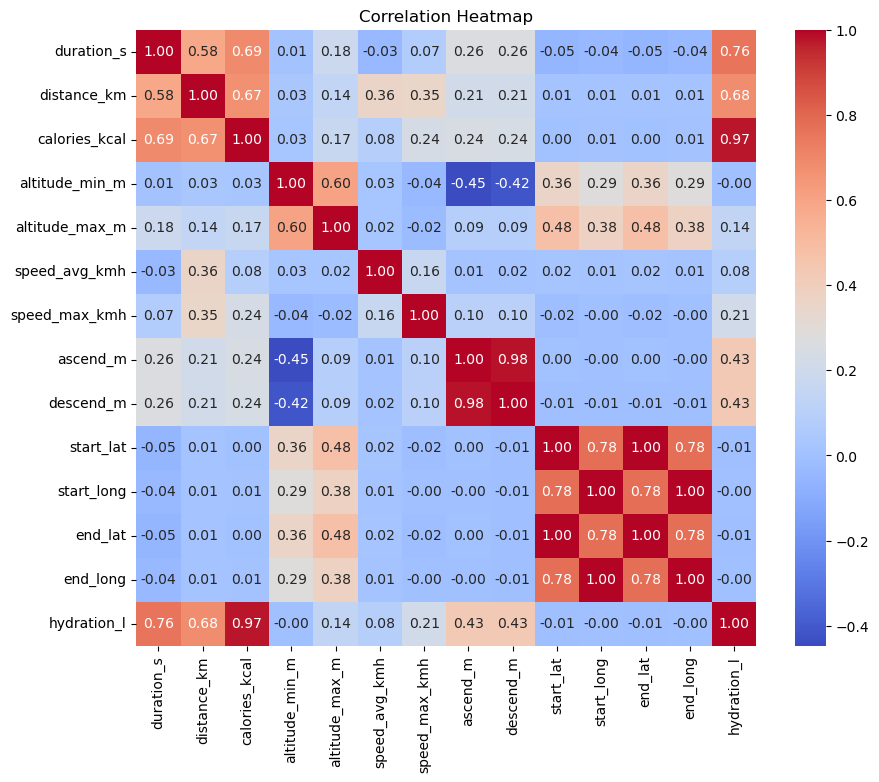

In [11]:
# Pairwise correlation matrix and heatmap
correlation_matrix = df_res.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The darker colors denote high correlations between each other. Here some paired correlation can be the cause of **data leakage**. So we will remove them before modelling. Now we will see the distribution of the numerical data.

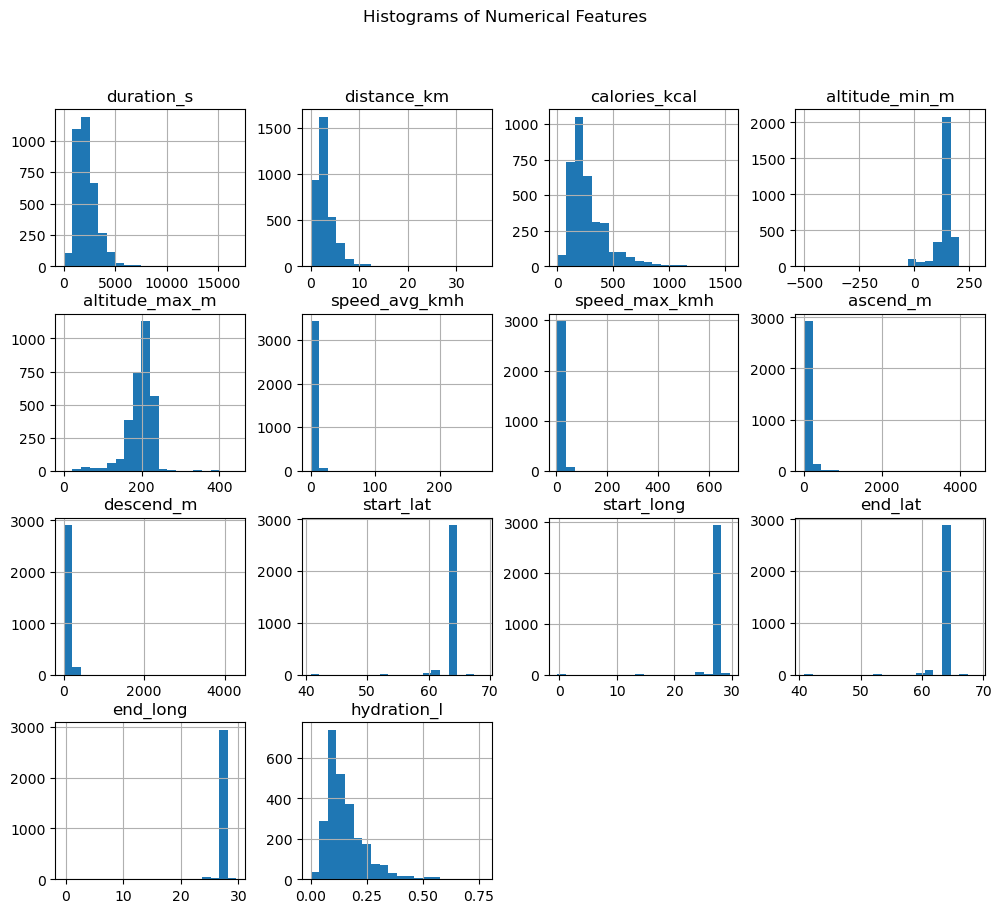

In [12]:
# Histograms of numerical features
numerical_features = df_res.select_dtypes(include=['int64', 'float64'])
numerical_features.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

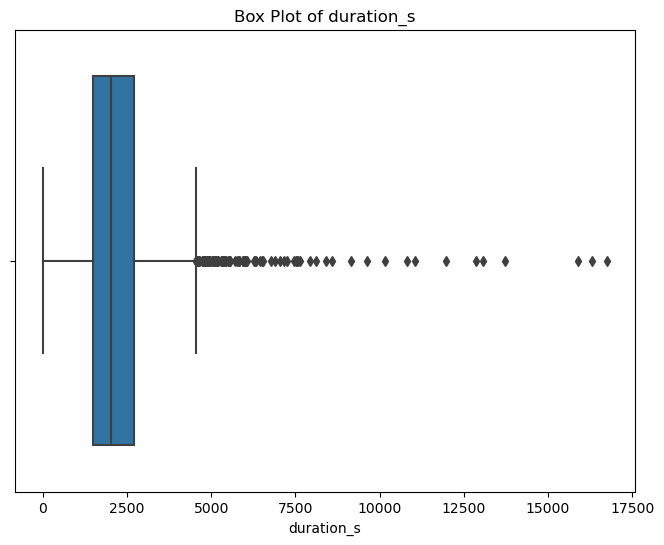

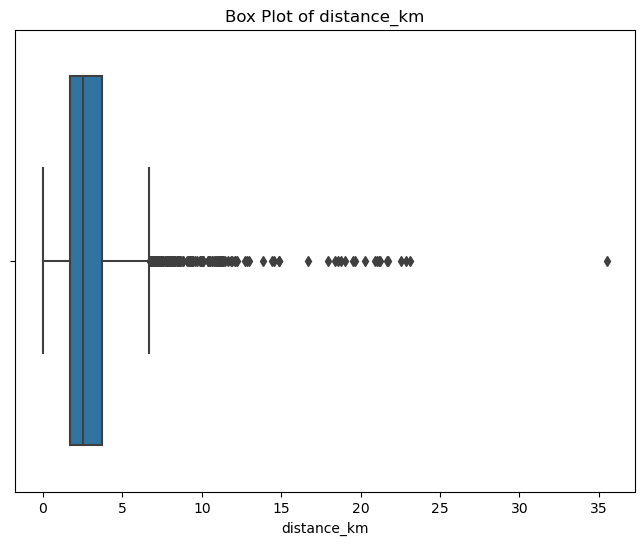

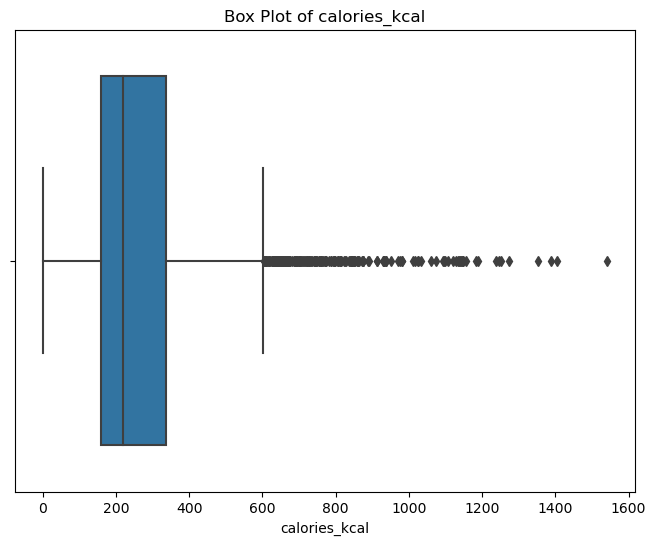

In [13]:
# Box plots for selected features
selected_features = ['duration_s', 'distance_km', 'calories_kcal']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_res, x=feature)
    plt.title(f"Box Plot of {feature}")
    plt.show()

The box plots showing the distributions and outliers which we will work with. Now we will explore the types of activities performed by the user and the frequencies of those activities

In [14]:
df_res['sport'].value_counts()

WALKING                   2763
WEIGHT_TRAINING            189
SWIMMING                   118
SKIING_CROSS_COUNTRY        95
RUNNING_CANICROSS           92
CYCLING_TRANSPORTATION      54
CYCLING_SPORT               51
BADMINTON                   38
RUNNING                     35
ICE_SKATING                 27
STAIR_CLIMBING              17
CROSSFIT                     9
ROLLER_SKATING               6
CROSS_TRAINING               6
FITNESS_WALKING              1
BEACH_VOLLEY                 1
STRETCHING                   1
Name: sport, dtype: int64

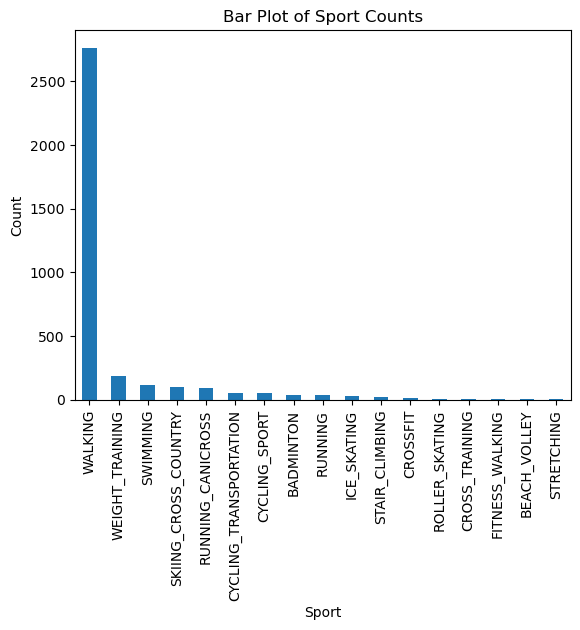

In [15]:
df_res['sport'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Sport Counts')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.show()

**Walking** is the most performed activity followed by weight training and swiimming.

## Data Cleaning
We need to clean the data before fitting it into a machine learning model. We will convert the datetime columns to appropriate data types.

In [16]:
# Convert 'created_date' to datetime
df_res['created_date'] = pd.to_datetime(df_res['created_date'])

# Convert 'start_time' to datetime
df_res['start_time'] = pd.to_datetime(df_res['start_time'])

# Convert 'end_time' to datetime
df_res['end_time'] = pd.to_datetime(df_res['end_time'])

In [17]:
df = df_res
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sport           3503 non-null   object        
 1   source          3503 non-null   object        
 2   created_date    3503 non-null   datetime64[ns]
 3   start_time      3503 non-null   datetime64[ns]
 4   end_time        3503 non-null   datetime64[ns]
 5   duration_s      3503 non-null   int64         
 6   distance_km     3503 non-null   float64       
 7   calories_kcal   3502 non-null   float64       
 8   altitude_min_m  3087 non-null   float64       
 9   altitude_max_m  3087 non-null   float64       
 10  speed_avg_kmh   3503 non-null   float64       
 11  speed_max_kmh   3082 non-null   float64       
 12  ascend_m        3084 non-null   float64       
 13  descend_m       3084 non-null   float64       
 14  start_lat       3081 non-null   float64       
 15  star

In [18]:
df.head()

,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.5,198.0,3.714012,6.3,78.0,77.0,64.231747,27.729461,64.231747,27.729461,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.5,174.5,3.885057,5.4,28.0,34.5,64.231885,27.729526,64.231885,27.729526,NaN
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.0,201.0,4.112583,6.3,119.5,47.5,64.231953,27.729530,64.231953,27.729530,NaN
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.5,159.5,8.646481,12.6,137.5,140.5,64.231735,27.729492,64.231735,27.729492,NaN


In [19]:
# Outlier removal 

# Select numeric columns only (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the IQR for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define a lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect and remove outliers
outliers_removed_df = df[~((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)]

In [20]:
outliers_removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 3501
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sport           2054 non-null   object        
 1   source          2054 non-null   object        
 2   created_date    2054 non-null   datetime64[ns]
 3   start_time      2054 non-null   datetime64[ns]
 4   end_time        2054 non-null   datetime64[ns]
 5   duration_s      2054 non-null   int64         
 6   distance_km     2054 non-null   float64       
 7   calories_kcal   2054 non-null   float64       
 8   altitude_min_m  1947 non-null   float64       
 9   altitude_max_m  1947 non-null   float64       
 10  speed_avg_kmh   2054 non-null   float64       
 11  speed_max_kmh   1945 non-null   float64       
 12  ascend_m        1944 non-null   float64       
 13  descend_m       1944 non-null   float64       
 14  start_lat       1943 non-null   float64       
 15  star

**It looks like a lot of rows have been dropped when we removed outliers. Taking that into consideration, I changed my mind to work with the original dataframe** 


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sport           3503 non-null   object        
 1   source          3503 non-null   object        
 2   created_date    3503 non-null   datetime64[ns]
 3   start_time      3503 non-null   datetime64[ns]
 4   end_time        3503 non-null   datetime64[ns]
 5   duration_s      3503 non-null   int64         
 6   distance_km     3503 non-null   float64       
 7   calories_kcal   3502 non-null   float64       
 8   altitude_min_m  3087 non-null   float64       
 9   altitude_max_m  3087 non-null   float64       
 10  speed_avg_kmh   3503 non-null   float64       
 11  speed_max_kmh   3082 non-null   float64       
 12  ascend_m        3084 non-null   float64       
 13  descend_m       3084 non-null   float64       
 14  start_lat       3081 non-null   float64       
 15  star

Now we will finn the missing values.

In [22]:
df.fillna(df.mean(), inplace=True)  # Replace missing values with the mean


C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4158336622.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)  # Replace missing values with the mean
C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\4158336622.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Replace missing values with the mean


In [23]:
# null count
df.isnull().sum()

sport             0
source            0
created_date      0
start_time        0
end_time          0
duration_s        0
distance_km       0
calories_kcal     0
altitude_min_m    0
altitude_max_m    0
speed_avg_kmh     0
speed_max_kmh     0
ascend_m          0
descend_m         0
start_lat         0
start_long        0
end_lat           0
end_long          0
hydration_l       0
dtype: int64

## Feature Engineering
Feature Engineering is very important for a machine learning project. It helps the model to understand the data better so that it can be well trained.

In [24]:
df.head()

,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.500000,198.000000,3.714012,6.300000,78.000000,77.000000,64.231747,27.729461,64.231747,27.729461,0.154651
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,137.269455,197.357688,0.000000,13.892394,95.870472,98.773677,63.906364,27.466786,63.906364,27.466786,0.154651
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.500000,174.500000,3.885057,5.400000,28.000000,34.500000,64.231885,27.729526,64.231885,27.729526,0.154651
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.000000,201.000000,4.112583,6.300000,119.500000,47.500000,64.231953,27.729530,64.231953,27.729530,0.154651
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.500000,159.500000,8.646481,12.600000,137.500000,140.500000,64.231735,27.729492,64.231735,27.729492,0.154651


**We are starting to create new features. We are creating the target variables along with new features**

In [25]:
# Sort the DataFrame by some relevant columns (e.g., 'created_date' or another column with a logical order)
# This step is important to ensure that the rows are in the desired order
df1 = df.sort_values(by=['created_date'])

# Create 'next_exercise' and 'previous_exercise' columns
df1['next_exercise'] = df1['sport'].shift(-1)
df1['previous_exercise'] = df1['sport'].shift(1)

# Set NaN for the 'next_exercise' of the last row and 'previous_exercise' of the first row
df1.at[df1.index[-1], 'next_exercise'] = None
df1.at[df1.index[0], 'previous_exercise'] = None

In [26]:
df1.tail(50)

,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,...,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l,next_exercise,previous_exercise
3453,WALKING,TRACK_MOBILE,2020-12-10 08:41:30,2020-12-10 08:39:44,2020-12-10 09:00:32,1243,1.885927,154.0,137.254000,178.754000,...,9.679790,24.330000,33.450000,64.231809,27.730134,64.231809,27.730134,0.085175,RUNNING_CANICROSS,WALKING
3454,RUNNING_CANICROSS,TRACK_MOBILE,2020-12-10 17:47:41,2020-12-10 17:46:17,2020-12-10 18:35:18,2941,6.162123,617.0,148.653000,179.096000,...,16.229900,52.064000,53.678000,64.231804,27.730325,64.231804,27.730325,0.314205,WALKING,WALKING
3455,WALKING,TRACK_MOBILE,2020-12-11 09:12:23,2020-12-11 09:10:21,2020-12-11 09:34:58,1476,1.903821,140.0,136.540000,175.609000,...,7.724990,22.420000,21.260000,64.231707,27.729551,64.231707,27.729551,0.081595,WALKING,RUNNING_CANICROSS
3456,WALKING,TRACK_MOBILE,2020-12-11 16:52:54,2020-12-11 16:51:06,2020-12-11 18:06:49,4543,6.099124,441.0,156.989000,228.053000,...,10.735800,121.036000,109.359000,64.231917,27.729604,64.231917,27.729604,0.256198,WALKING,WALKING
3457,WALKING,TRACK_MOBILE,2020-12-12 09:18:52,2020-12-12 09:16:59,2020-12-12 10:20:57,3836,5.064463,368.0,138.143000,182.710000,...,7.737370,66.551000,52.290000,64.231736,27.729123,64.231736,27.729123,0.214369,WALKING,WALKING
3458,WALKING,TRACK_MOBILE,2020-12-12 14:55:07,2020-12-12 14:53:19,2020-12-12 15:30:45,2246,2.948443,215.0,164.651000,216.570000,...,7.715190,66.739000,67.875000,64.231750,27.729426,64.231750,27.729426,0.125206,SWIMMING,WALKING
3459,SWIMMING,INPUT_MANUAL_MOBILE,2020-12-12 15:40:46,2020-12-08 12:00:24,2020-12-08 12:25:24,1500,1.000000,337.0,137.269455,197.357688,...,13.892394,95.870472,98.773677,63.906364,27.466786,63.906364,27.466786,0.170183,WALKING,WALKING
3460,WALKING,TRACK_MOBILE,2020-12-13 09:38:17,2020-12-13 09:37:14,2020-12-13 10:06:38,1761,2.305980,168.0,159.393000,220.192000,...,7.802410,54.256000,65.363000,64.232438,27.731192,64.232438,27.731192,0.098057,SWIMMING,SWIMMING
3461,SWIMMING,INPUT_MANUAL_MOBILE,2020-12-13 10:07:40,2020-12-12 16:00:25,2020-12-12 16:25:25,1500,1.000000,337.0,137.269455,197.357688,...,13.892394,95.870472,98.773677,63.906364,27.466786,63.906364,27.466786,0.170183,RUNNING_CANICROSS,WALKING
3462,RUNNING_CANICROSS,TRACK_MOBILE,2020-12-13 18:01:52,2020-12-13 17:59:55,2020-12-13 18:49:05,2949,4.909320,434.0,134.542000,173.130000,...,13.936900,51.102000,53.822000,64.231690,27.729530,64.231690,27.729530,0.232155,WALKING,SWIMMING


In [27]:
# Create 'next_time' and 'previous_time' columns
df1['next_time'] = df1['start_time'].shift(-1)
df1['previous_time'] = df1['start_time'].shift(1)

# Create 'next_duration' and 'previous_duration' columns
df1['next_duration'] = df1['duration_s'].shift(-1)
df1['previous_duration'] = df1['duration_s'].shift(1)

# Set NaN for the 'next_time' and 'next_duration' of the last row and 'previous_time' and 'previous_duration' of the first row
df1.at[df.index[-1], 'next_time'] = None
df1.at[df.index[-1], 'next_duration'] = None
df1.at[df.index[0], 'previous_time'] = None
df1.at[df.index[0], 'previous_duration'] = None

In [28]:
df1.head()

,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,...,start_long,end_lat,end_long,hydration_l,next_exercise,previous_exercise,next_time,previous_time,next_duration,previous_duration
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.500000,198.000000,...,27.729461,64.231747,27.729461,0.154651,WEIGHT_TRAINING,None,2017-01-01 14:01:00,NaT,2400.0,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,137.269455,197.357688,...,27.466786,63.906364,27.466786,0.154651,WALKING,WALKING,2017-01-01 17:46:00,2017-01-01 08:53:04,1566.0,2084.0
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.500000,174.500000,...,27.729526,64.231885,27.729526,0.154651,WALKING,WEIGHT_TRAINING,2017-01-02 08:55:52,2017-01-01 14:01:00,1812.0,2400.0
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.000000,201.000000,...,27.729530,64.231953,27.729530,0.154651,RUNNING,WALKING,2017-01-02 16:13:34,2017-01-01 17:46:00,2444.0,1566.0
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.500000,159.500000,...,27.729492,64.231735,27.729492,0.154651,WALKING,WALKING,2017-01-03 09:19:16,2017-01-02 08:55:52,1963.0,1812.0


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 0 to 3502
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sport              3503 non-null   object        
 1   source             3503 non-null   object        
 2   created_date       3503 non-null   datetime64[ns]
 3   start_time         3503 non-null   datetime64[ns]
 4   end_time           3503 non-null   datetime64[ns]
 5   duration_s         3503 non-null   int64         
 6   distance_km        3503 non-null   float64       
 7   calories_kcal      3503 non-null   float64       
 8   altitude_min_m     3503 non-null   float64       
 9   altitude_max_m     3503 non-null   float64       
 10  speed_avg_kmh      3503 non-null   float64       
 11  speed_max_kmh      3503 non-null   float64       
 12  ascend_m           3503 non-null   float64       
 13  descend_m          3503 non-null   float64       
 14  start_la

In [30]:
# Fill NaN values in 'next_duration' and 'previous_duration' with the mean of their respective columns
mean_next_duration = df1['next_duration'].mean()
mean_previous_duration = df1['previous_duration'].mean()

df1['next_duration'].fillna(mean_next_duration, inplace=True)
df1['previous_duration'].fillna(mean_previous_duration, inplace=True)

# Fill NaN values in 'next_exercise' and 'previous_exercise' with the mode of their respective columns
mode_next_exercise = df1['next_exercise'].mode().iloc[0]
mode_previous_exercise = df1['previous_exercise'].mode().iloc[0]

df1['next_exercise'].fillna(mode_next_exercise, inplace=True)
df1['previous_exercise'].fillna(mode_previous_exercise, inplace=True)

In [31]:
pd.set_option('display.max_rows', 100)
df1.head()

,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,...,start_long,end_lat,end_long,hydration_l,next_exercise,previous_exercise,next_time,previous_time,next_duration,previous_duration
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.500000,198.000000,...,27.729461,64.231747,27.729461,0.154651,WEIGHT_TRAINING,WALKING,2017-01-01 14:01:00,NaT,2400.0,2254.263564
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,137.269455,197.357688,...,27.466786,63.906364,27.466786,0.154651,WALKING,WALKING,2017-01-01 17:46:00,2017-01-01 08:53:04,1566.0,2084.000000
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.500000,174.500000,...,27.729526,64.231885,27.729526,0.154651,WALKING,WEIGHT_TRAINING,2017-01-02 08:55:52,2017-01-01 14:01:00,1812.0,2400.000000
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.000000,201.000000,...,27.729530,64.231953,27.729530,0.154651,RUNNING,WALKING,2017-01-02 16:13:34,2017-01-01 17:46:00,2444.0,1566.000000
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.500000,159.500000,...,27.729492,64.231735,27.729492,0.154651,WALKING,WALKING,2017-01-03 09:19:16,2017-01-02 08:55:52,1963.0,1812.000000


## Seperating all date and time to month, day and hour with one hot encoding

In [34]:
# Define a list of date and time columns to perform feature extraction on
date_time_columns = ['created_date', 'start_time', 'end_time', 'next_time', 'previous_time']

# Perform feature extraction for each date and time column
for col in date_time_columns:
    df1[col + '_year'] = df1[col].dt.year
    df1[col + '_month'] = df1[col].dt.month
    df1[col + '_day'] = df1[col].dt.day
    df1[col + '_day_of_week'] = df1[col].dt.dayofweek
    df1[col + '_hour'] = df1[col].dt.hour

    # You can add more date and time features as needed

# One-hot encoding for day of the week in all columns
for col in date_time_columns:
    df1 = pd.get_dummies(df1, columns=[col + '_day_of_week'], prefix=col + '_day')


In [35]:
df1.head()

,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,...,next_time_day_4.0,next_time_day_5.0,next_time_day_6.0,previous_time_day_0.0,previous_time_day_1.0,previous_time_day_2.0,previous_time_day_3.0,previous_time_day_4.0,previous_time_day_5.0,previous_time_day_6.0
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.500000,198.000000,...,0,0,1,0,0,0,0,0,0,0
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,137.269455,197.357688,...,0,0,1,0,0,0,0,0,0,1
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.500000,174.500000,...,0,0,0,0,0,0,0,0,0,1
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.000000,201.000000,...,0,0,0,0,0,0,0,0,0,1
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.500000,159.500000,...,0,0,0,1,0,0,0,0,0,0


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 0 to 3502
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sport                  3503 non-null   object        
 1   source                 3503 non-null   object        
 2   created_date           3503 non-null   datetime64[ns]
 3   start_time             3503 non-null   datetime64[ns]
 4   end_time               3503 non-null   datetime64[ns]
 5   duration_s             3503 non-null   int64         
 6   distance_km            3503 non-null   float64       
 7   calories_kcal          3503 non-null   float64       
 8   altitude_min_m         3503 non-null   float64       
 9   altitude_max_m         3503 non-null   float64       
 10  speed_avg_kmh          3503 non-null   float64       
 11  speed_max_kmh          3503 non-null   float64       
 12  ascend_m               3503 non-null   float64       
 13  des

In [39]:
df1.isnull().sum()

sport                    0
source                   0
created_date             0
start_time               0
end_time                 0
duration_s               0
distance_km              0
calories_kcal            0
altitude_min_m           0
altitude_max_m           0
speed_avg_kmh            0
speed_max_kmh            0
ascend_m                 0
descend_m                0
start_lat                0
start_long               0
end_lat                  0
end_long                 0
hydration_l              0
next_exercise            0
previous_exercise        0
next_time                1
previous_time            1
next_duration            0
previous_duration        0
created_date_year        0
created_date_month       0
created_date_day         0
created_date_hour        0
start_time_year          0
start_time_month         0
start_time_day           0
start_time_hour          0
end_time_year            0
end_time_month           0
end_time_day             0
end_time_hour            0
n

We have new features now to help the model understand the data better. We will make sure that we dont have any null values.

In [40]:
# removing the null rows
df1 = df1.dropna()

In [41]:
df1.head()

,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,...,next_time_day_4.0,next_time_day_5.0,next_time_day_6.0,previous_time_day_0.0,previous_time_day_1.0,previous_time_day_2.0,previous_time_day_3.0,previous_time_day_4.0,previous_time_day_5.0,previous_time_day_6.0
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,137.269455,197.357688,...,0,0,1,0,0,0,0,0,0,1
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.500000,174.500000,...,0,0,0,0,0,0,0,0,0,1
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.000000,201.000000,...,0,0,0,0,0,0,0,0,0,1
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.500000,159.500000,...,0,0,0,1,0,0,0,0,0,0
5,WALKING,TRACK_MOBILE,2017-01-03 09:25:22,2017-01-03 09:19:16,2017-01-03 09:53:05,1963,2.15,167.024,138.000000,198.000000,...,0,0,0,1,0,0,0,0,0,0


Now that we dont need the real datetime columns (because we have extracted the date time information into seperate columns), we will remove them.

In [42]:
# Define a list of columns to drop, including the original datetime columns
columns_to_drop = ['created_date', 'start_time', 'end_time', 'next_time', 'previous_time']

# Drop the datetime columns from the DataFrame
df1 = df1.drop(columns=columns_to_drop)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3501 entries, 1 to 3501
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sport                  3501 non-null   object 
 1   source                 3501 non-null   object 
 2   duration_s             3501 non-null   int64  
 3   distance_km            3501 non-null   float64
 4   calories_kcal          3501 non-null   float64
 5   altitude_min_m         3501 non-null   float64
 6   altitude_max_m         3501 non-null   float64
 7   speed_avg_kmh          3501 non-null   float64
 8   speed_max_kmh          3501 non-null   float64
 9   ascend_m               3501 non-null   float64
 10  descend_m              3501 non-null   float64
 11  start_lat              3501 non-null   float64
 12  start_long             3501 non-null   float64
 13  end_lat                3501 non-null   float64
 14  end_long               3501 non-null   float64
 15  hydr

We still need to convert some columns to integer.

In [46]:
# Define the list of columns to convert to integer
int_columns = [
    'next_time_year', 'next_time_month', 'next_time_day', 'next_time_hour',
    'previous_time_year', 'previous_time_month', 'previous_time_day', 'previous_time_hour'
]

# Convert the specified columns to integer
df1[int_columns] = df1[int_columns].astype(int)


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3501 entries, 1 to 3501
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sport                  3501 non-null   object 
 1   source                 3501 non-null   object 
 2   duration_s             3501 non-null   int64  
 3   distance_km            3501 non-null   float64
 4   calories_kcal          3501 non-null   float64
 5   altitude_min_m         3501 non-null   float64
 6   altitude_max_m         3501 non-null   float64
 7   speed_avg_kmh          3501 non-null   float64
 8   speed_max_kmh          3501 non-null   float64
 9   ascend_m               3501 non-null   float64
 10  descend_m              3501 non-null   float64
 11  start_lat              3501 non-null   float64
 12  start_long             3501 non-null   float64
 13  end_lat                3501 non-null   float64
 14  end_long               3501 non-null   float64
 15  hydr

**Encoding the categorical columns** : We will use One Hot Encoding for this. Encoding is important for models to understand the data.

In [51]:
# Identify object (categorical) columns
object_columns = df1.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each object column
for col in object_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

## Feature Selection
This is the time select only important features for our model. We will remove those features are not important for the model and can introduce data leakage.

In [62]:
# Define your target variables
target_variables = ['next_exercise', 'next_time_hour', 'next_time_day', 'next_duration']

# Calculate correlations with the target variables
correlations = df1.corr()

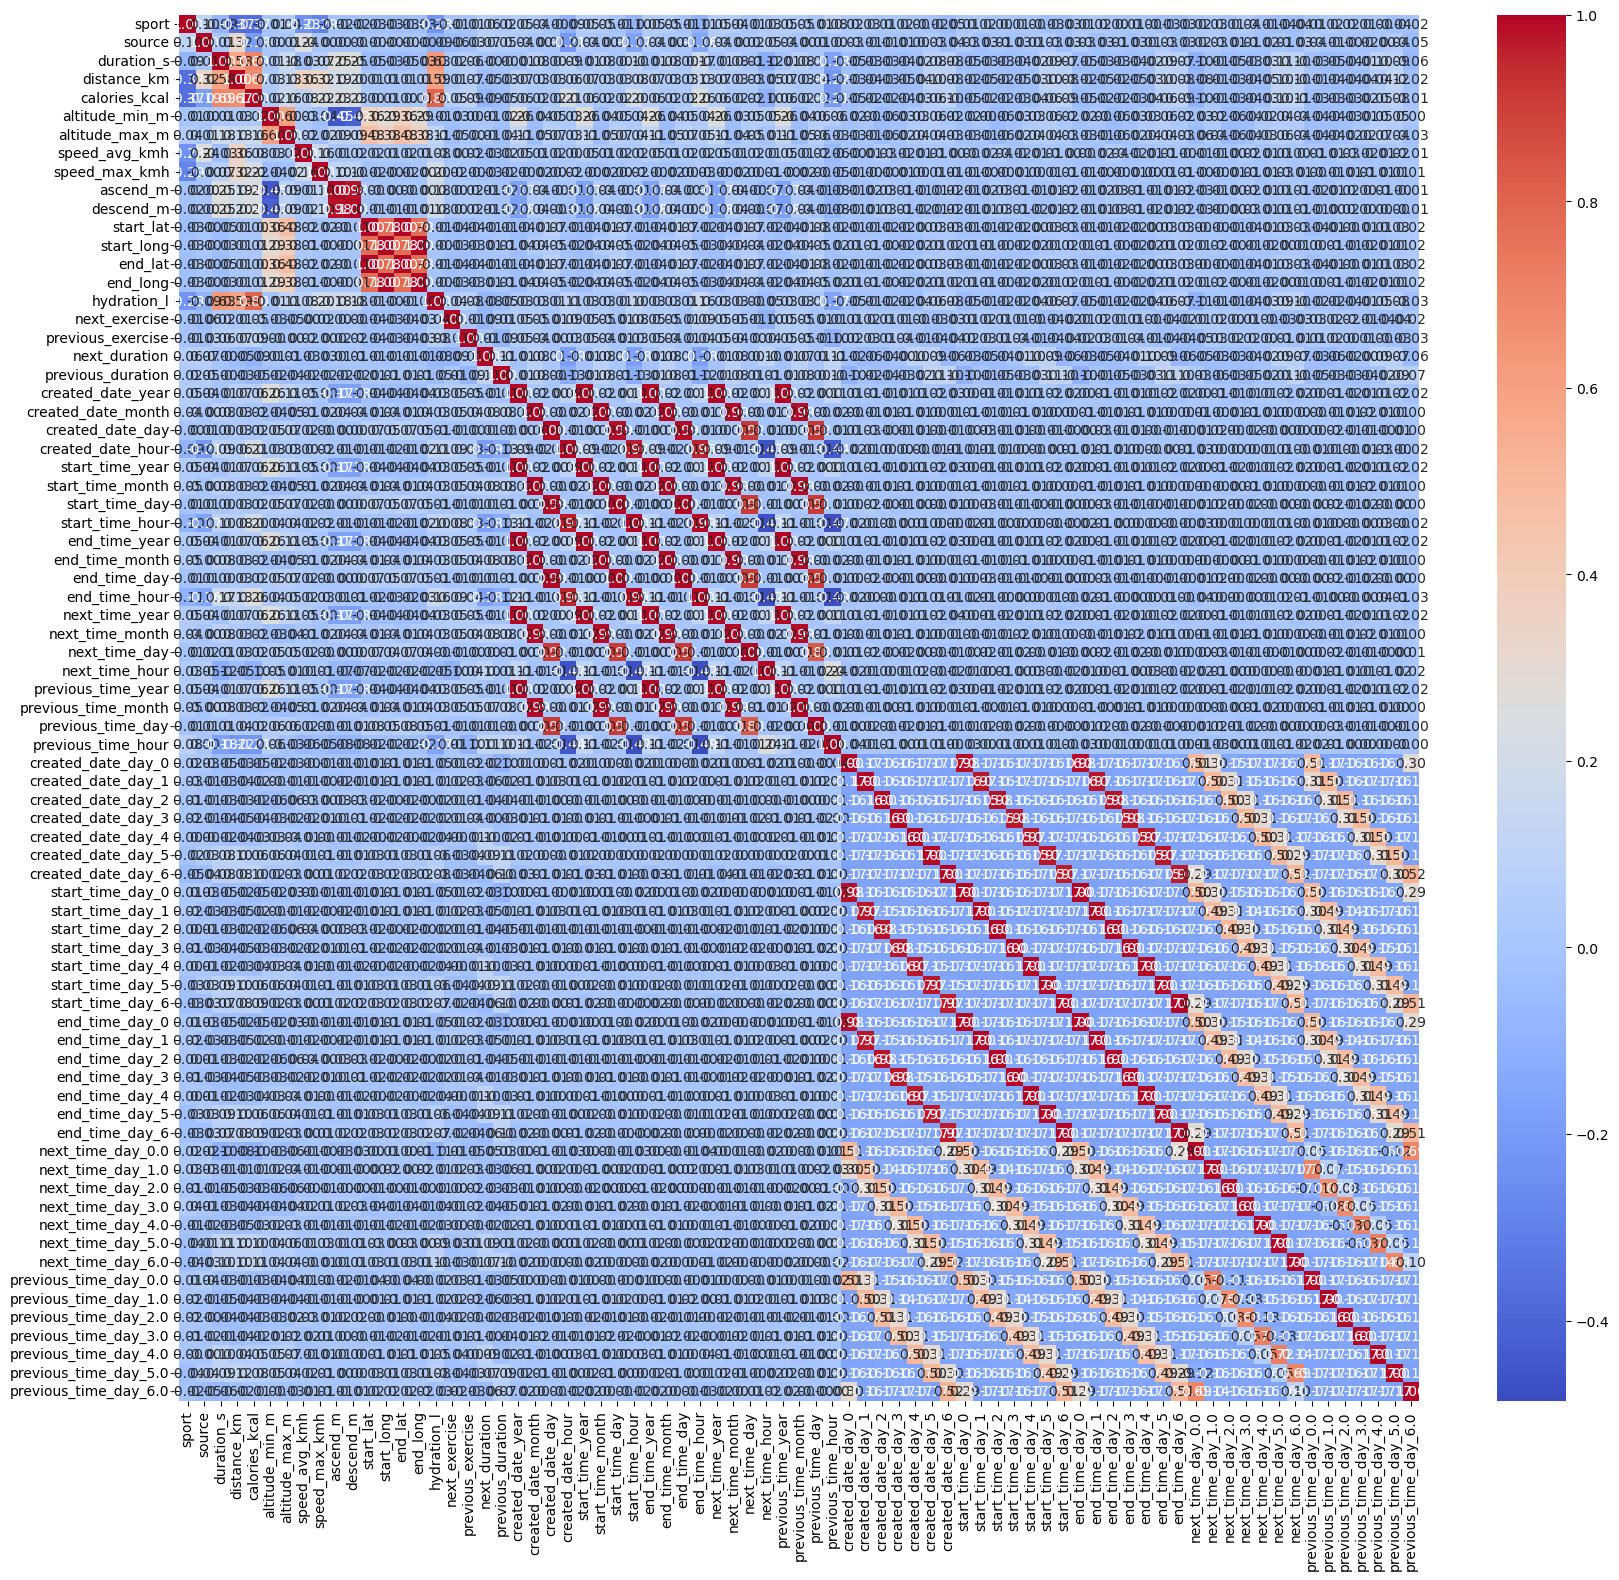

In [64]:
# Set the figure size
plt.figure(figsize=(20, 18))  # Adjust the width and height as needed

# Create a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

# Show the heatmap
plt.show()

From the above correlation, its difficult to understand if there is a possibility to introduce any data leakage in the model or not but we can see it from the previous heatmap where we had only the raw features.

C:\Users\FARSIM\AppData\Local\Temp\ipykernel_12216\3855139582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_res.corr()


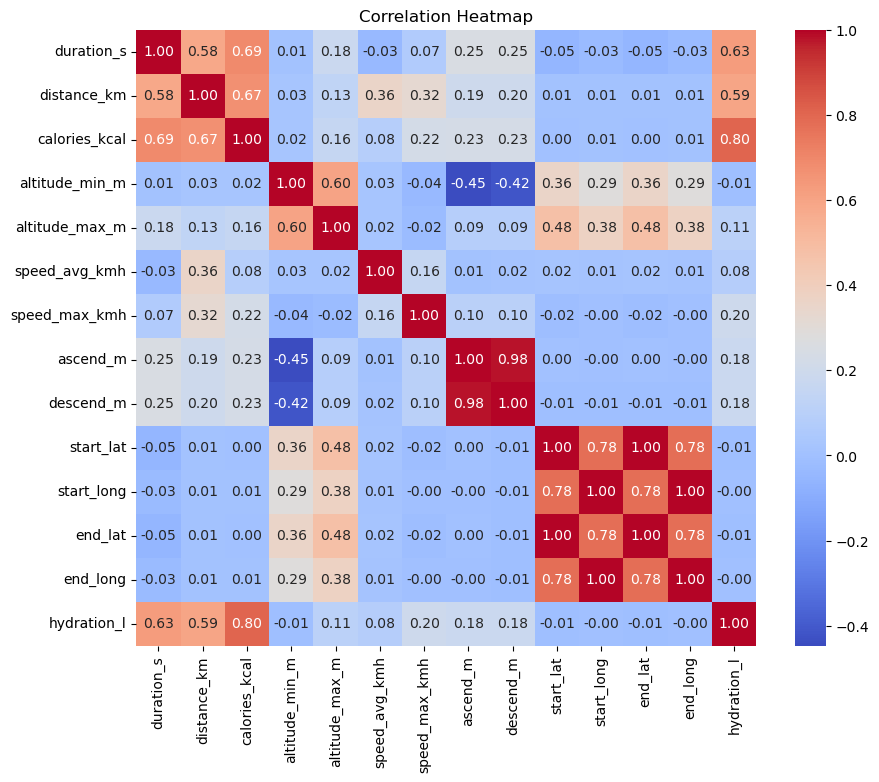

In [65]:
# Pairwise correlation matrix and heatmap
correlation_matrix = df_res.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

We can get rid of start latitude, end longditude columns

In [66]:
columns_to_drop = ['start_lat', 'end_long']

# Drop the specified columns from the DataFrame
df1 = df1.drop(columns=columns_to_drop, axis=1)

In [67]:
df1.columns

Index(['sport', 'source', 'duration_s', 'distance_km', 'calories_kcal',
       'altitude_min_m', 'altitude_max_m', 'speed_avg_kmh', 'speed_max_kmh',
       'ascend_m', 'descend_m', 'start_long', 'end_lat', 'hydration_l',
       'next_exercise', 'previous_exercise', 'next_duration',
       'previous_duration', 'created_date_year', 'created_date_month',
       'created_date_day', 'created_date_hour', 'start_time_year',
       'start_time_month', 'start_time_day', 'start_time_hour',
       'end_time_year', 'end_time_month', 'end_time_day', 'end_time_hour',
       'next_time_year', 'next_time_month', 'next_time_day', 'next_time_hour',
       'previous_time_year', 'previous_time_month', 'previous_time_day',
       'previous_time_hour', 'created_date_day_0', 'created_date_day_1',
       'created_date_day_2', 'created_date_day_3', 'created_date_day_4',
       'created_date_day_5', 'created_date_day_6', 'start_time_day_0',
       'start_time_day_1', 'start_time_day_2', 'start_time_day_3',
    

## Modelling
We have both categorical and continuous columns to predict. So we will use both classifier and regression models

### Predicting Categorical Variables

In [69]:
# Define your categorical target variables
categorical_targets = ['next_exercise', 'next_time_hour', 'next_time_day']

# Define your continuous target variable
continuous_target = 'next_duration'

In [70]:
# Split the data into features (X) and categorical target variables (y_categorical)
X = df1.drop(categorical_targets + [continuous_target], axis=1)
y_categorical = df1[categorical_targets]

# Split the data into features (X) and continuous target variable (y_continuous)
y_continuous = df1[continuous_target]

# Perform train-test split for categorical target variables
X_train, X_test, y_categorical_train, y_categorical_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [71]:
# Train separate Random Forest Classifier models for categorical target variables
models_categorical = {}
for target in categorical_targets:
    model = RandomForestClassifier()
    model.fit(X_train, y_categorical_train[target])
    models_categorical[target] = model

In [72]:
# Evaluate the performance of categorical models (e.g., accuracy)
for target in categorical_targets:
    y_categorical_pred = models_categorical[target].predict(X_test)
    accuracy = accuracy_score(y_categorical_test[target], y_categorical_pred)
    print(f"Target: {target}")
    print(f"Accuracy: {accuracy}\n")

Target: next_exercise
Accuracy: 0.776034236804565

Target: next_time_hour
Accuracy: 0.2710413694721826

Target: next_time_day
Accuracy: 0.7874465049928673



### Predicting Continuous Target Variable ('next_duration')

In [74]:
# Perform train-test split for the continuous target variable
X_train, X_test, y_continuous_train, y_continuous_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

In [75]:
# Create a Linear Regression model for the continuous target variable
model_continuous = LinearRegression()
model_continuous.fit(X_train, y_continuous_train)


LinearRegression()

In [76]:
# Evaluate the performance of the Linear Regression model (e.g., Mean Squared Error and R-squared)
y_continuous_pred = model_continuous.predict(X_test)
mse = mean_squared_error(y_continuous_test, y_continuous_pred)
r2 = r2_score(y_continuous_test, y_continuous_pred)

print("Target: next_duration")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Target: next_duration
Mean Squared Error: 1665440.4288097578
R-squared: 0.04266002229979138


## Conclusion

In this project, we endeavored to predict users' next exercise categories and the duration of their activities using machine learning. The results are both promising and provide valuable insights for further refinement. For the prediction of "next_exercise," we achieved an accuracy of approximately **77.6%**, suggesting that our model effectively captures exercise patterns and preferences. However, predicting "next_time_hour" presents a greater challenge, yielding an accuracy of around **27.1%**, indicative of the inherent complexity in forecasting precise timing. In contrast, "next_time_day" prediction achieved an accuracy of about **78.7%**, showcasing our model's aptitude in categorizing exercises by broad time intervals. Lastly, for "next_duration," our model exhibited a Mean Squared Error of approximately 1,665,440, and an R-squared value of **0.043**, suggesting room for improvement in accurately estimating exercise duration.

To further enhance the project, future steps may include feature engineering to extract more relevant information from the data, hyperparameter tuning to optimize model performance, and exploring more sophisticated algorithms tailored to time-based predictions. Deployment of these predictive models into fitness tracking apps and wearables could empower users with personalized recommendations and workout plans. Additionally, post-deployment, gathering user feedback and behavior data could facilitate ongoing model enhancement and fine-tuning. Overall, this project represents an exciting exploration of predictive technology in the realm of fitness, with the potential to transform the way individuals approach and engage in their exercise routines.